In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(22)


T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 100)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 100)) #constant
num_series = 100
B = 2000
delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=5) #constant

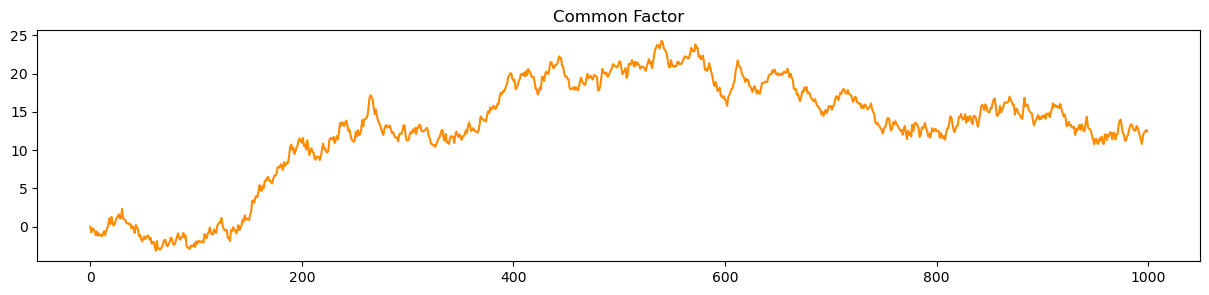

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [9]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

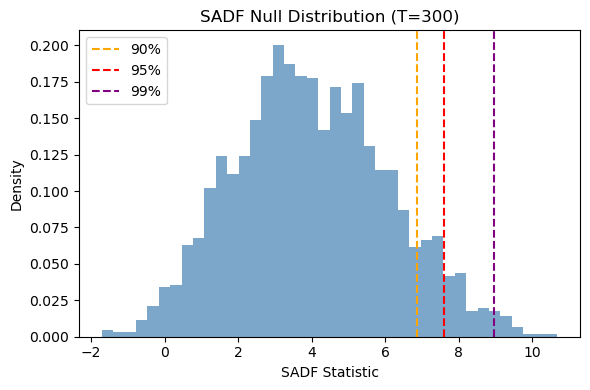

     Critical Value
90%        6.879755
95%        7.610642
99%        8.970879


beta =  [-2.24660402e-02  3.40466141e-01 -2.52759806e-01  5.07102544e-01
  2.04997176e-01 -1.54370132e-02 -2.75794874e-02 -1.48302737e-02
  6.69109094e-02 -8.88523658e-02 -1.96343561e-01  3.83649254e-02
 -7.29909612e-02 -4.99225032e-02  5.14068901e-02 -2.22305028e-02
  2.58676684e-01 -1.10995400e-01 -7.56488258e-02 -3.63804576e-01
 -2.09271727e-01  1.79425575e-01  2.64192993e-01 -4.12662009e-01
  1.46021133e-01  1.87242824e-02 -2.69878372e-01 -9.48738988e-02
 -1.36789499e-01  3.05112598e-02 -2.84026161e-01  1.95192770e-01
  2.05259904e-01  2.73337686e-01 -7.42173137e-02  2.44209373e-01
 -9.26111482e-02 -1.50815286e-01 -4.02140224e-01  2.33649627e-01
  2.83747517e-01  2.33183045e-01 -2.71956624e-01 -1.96079415e-01
  1.55790636e-01  1.59066344e-01 -1.29491401e-01  2.32260038e-01
 -7.73929634e-02  3.27782785e-01 -3.90387044e-02 -3.07639635e-01
 -1.99822419e-01  1.45309971e-01  5.27000381e-02 -4.68082086e-04


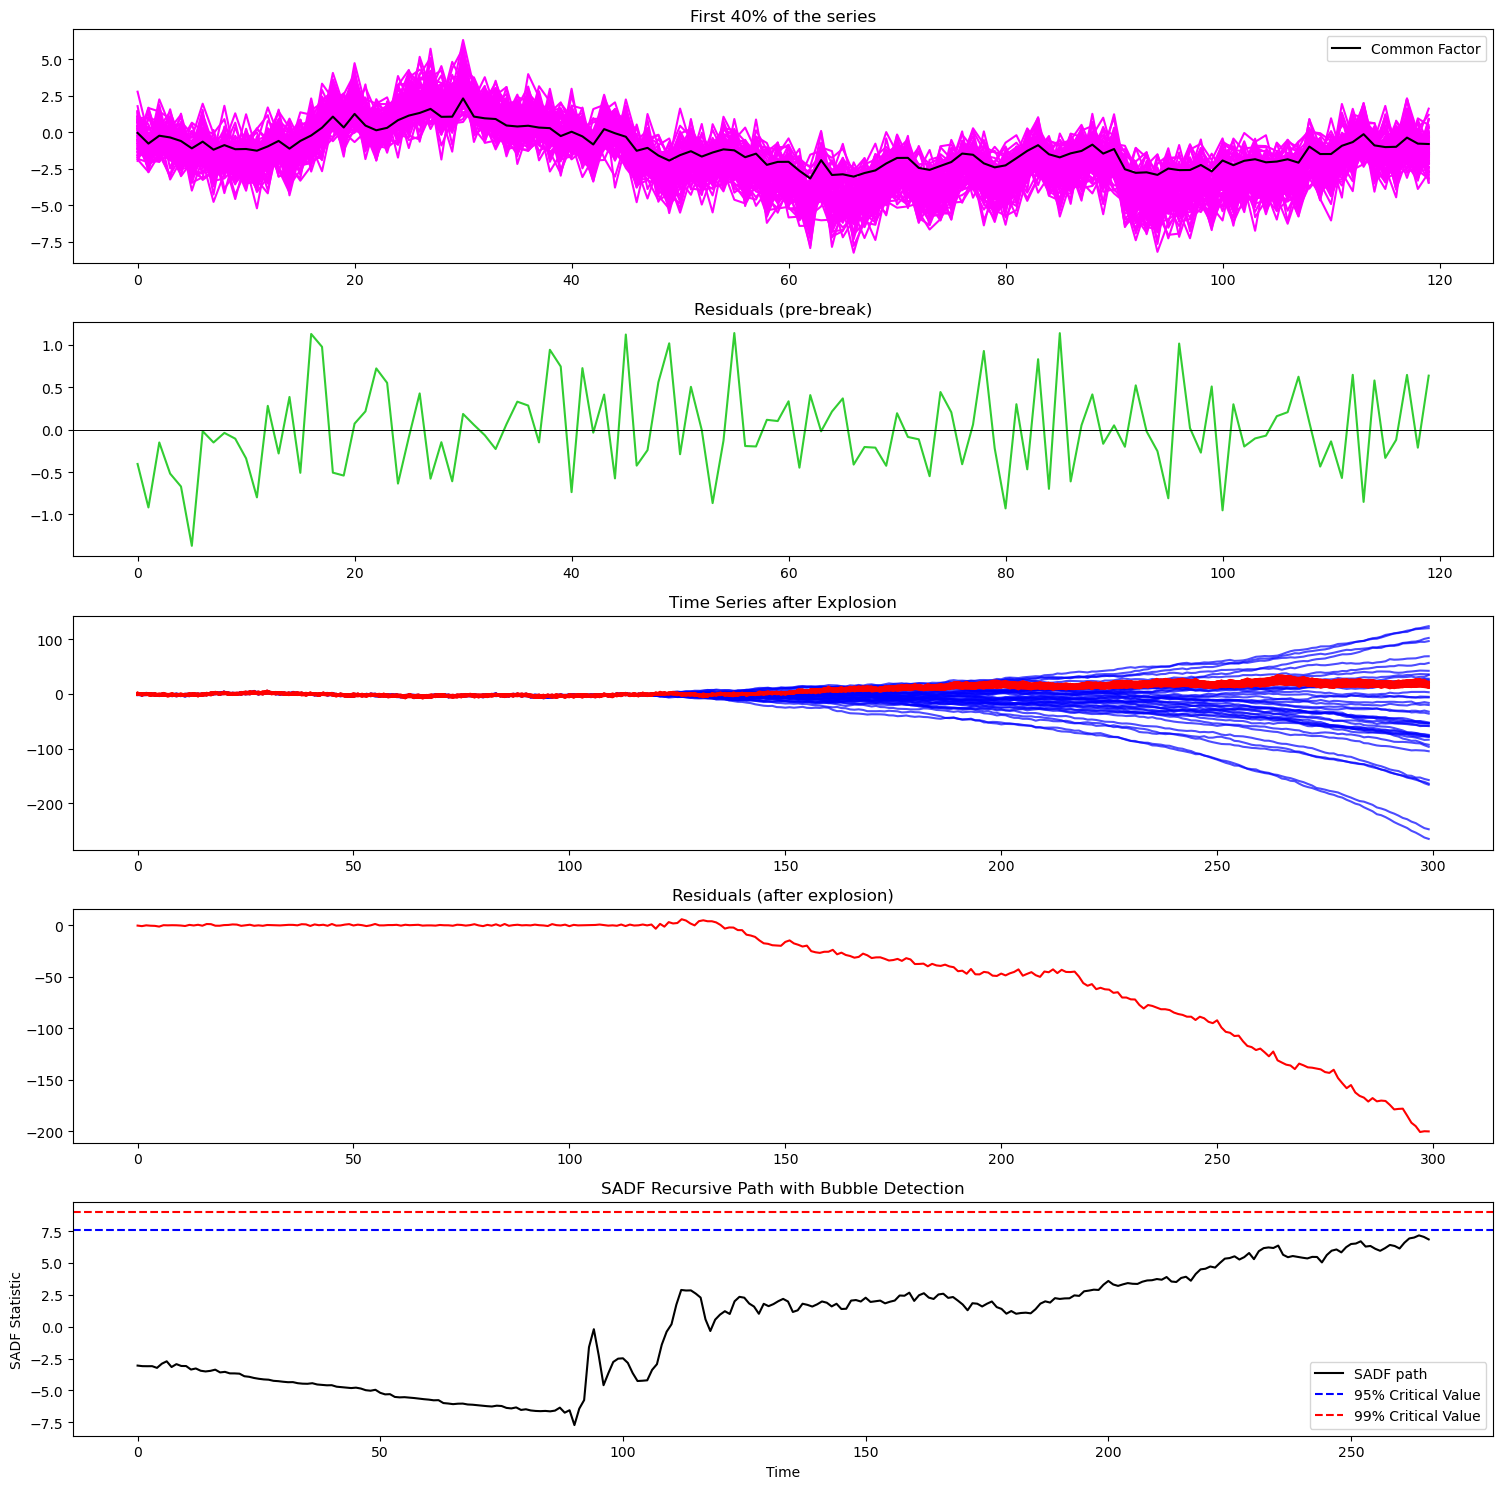

Time series is Non Explosive. SADF Value is: 7.16

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [10]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [11]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

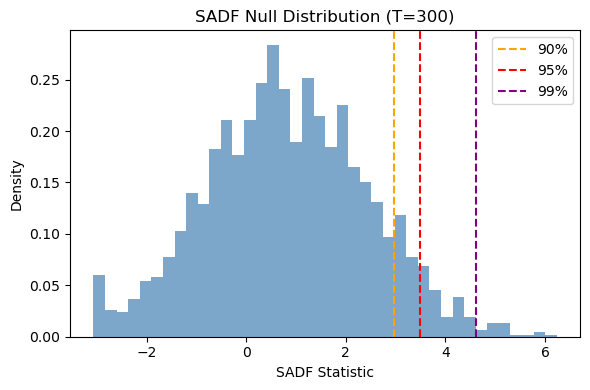

     Critical Value
90%        2.976103
95%        3.481887
99%        4.603117


beta =  [ 0.07125114  0.23138246 -0.10296481  0.1014295   0.06635642 -0.06820031
  0.05383862  0.10177927  0.20511455  0.12140836 -0.0686712  -0.05384481
 -0.15495692 -0.219533    0.03444741 -0.00280287  0.19566175 -0.08039452
  0.17467044 -0.03911115  0.03079641  0.05262059  0.06533011 -0.06314337
  0.01956543 -0.10776849  0.01144001  0.07583128 -0.08476431 -0.05937995
 -0.12619066  0.05016379 -0.0006327   0.10887461  0.09503542  0.15843979
 -0.04570423  0.07915934 -0.08582839  0.00745083  0.0783053  -0.05485043
 -0.02418675 -0.0112446  -0.03548291  0.14513877 -0.09219877  0.13214062
 -0.18089306  0.00471459 -0.0362218  -0.03066079 -0.15706015  0.0076877
 -0.07820721  0.09366788 -0.0835952   0.07257056 -0.06855017 -0.04037972
  0.04081762  0.01352036  0.19315577  0.05268443 -0.00830088  0.00200813
 -0.00199043  0.10657953  0.17587974 -0.08504294  0.01865228  0.05716683
 -0.02242534  0.1953104   0.1455463

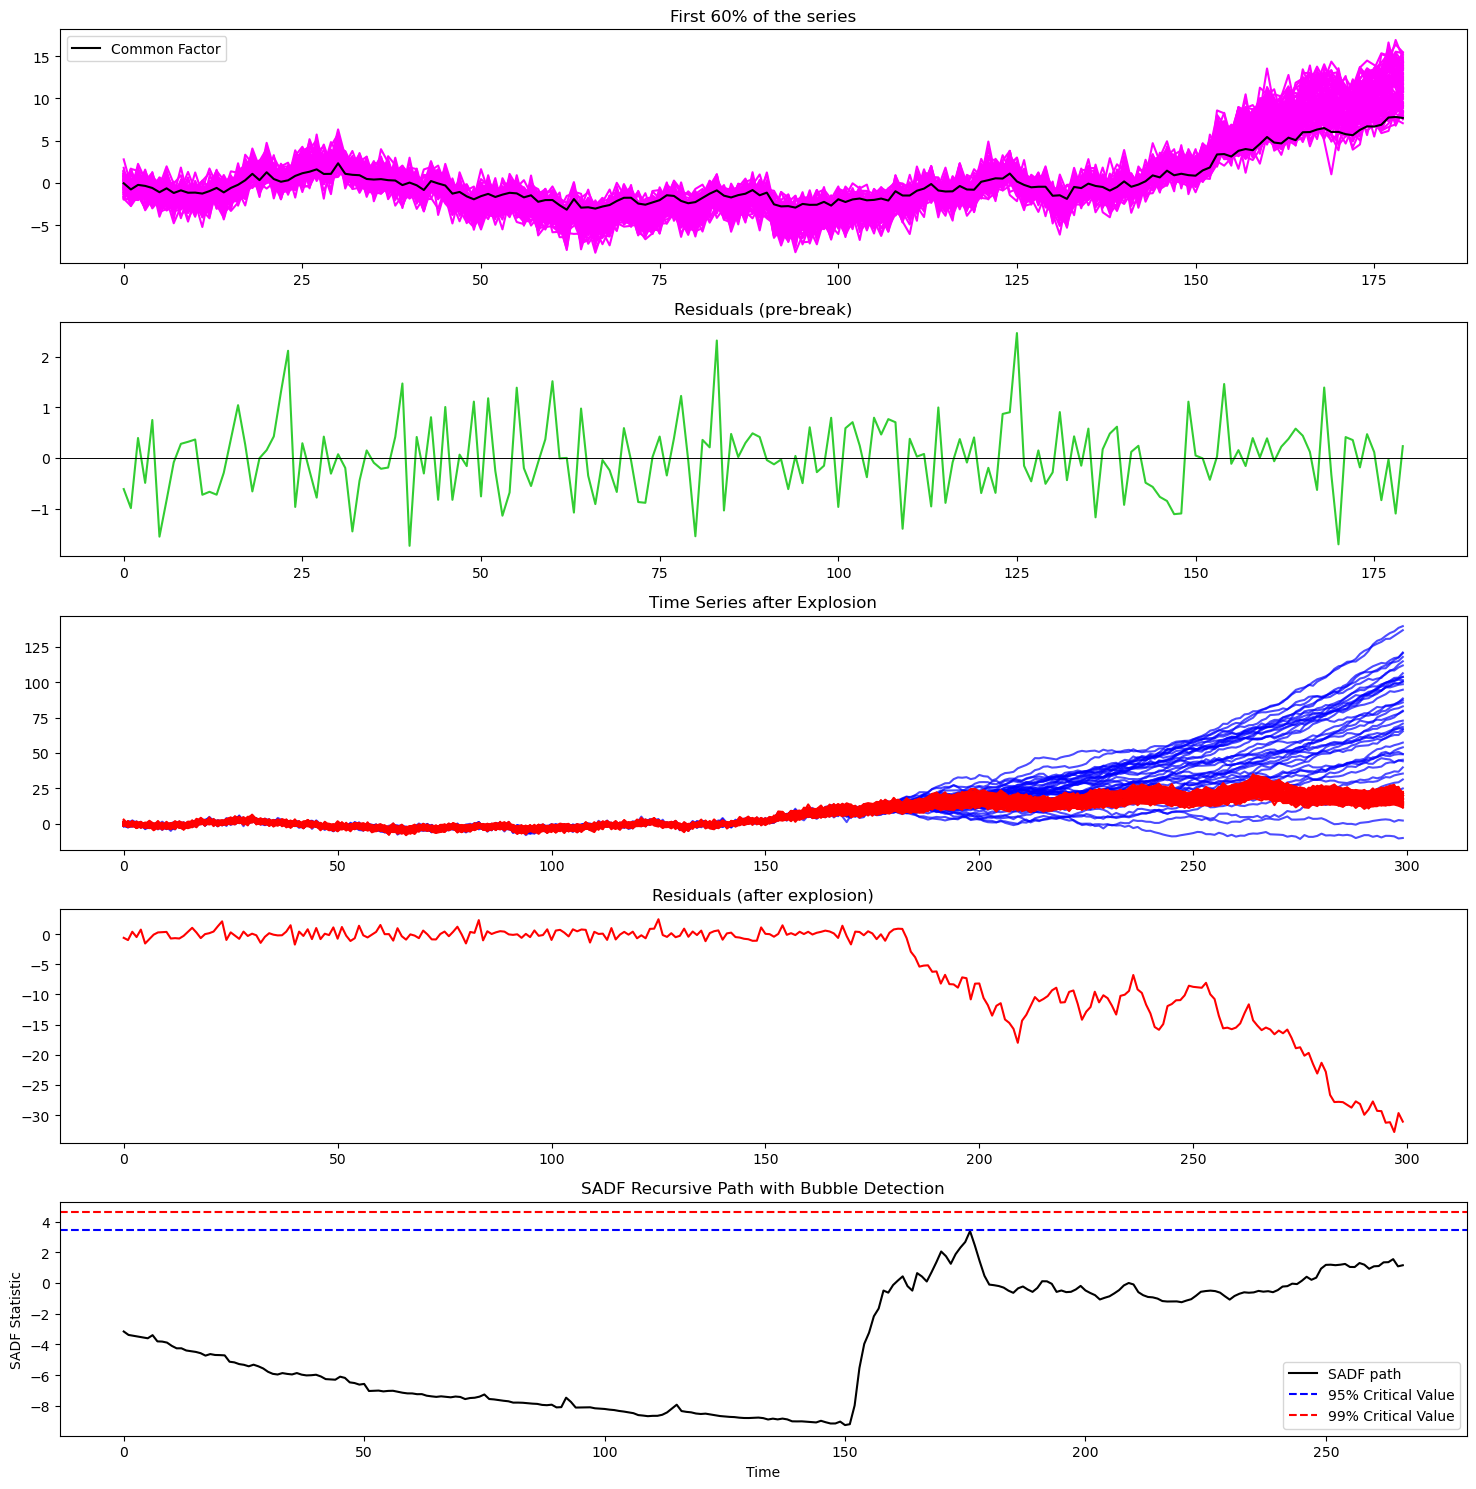

Time series is Non Explosive. SADF Value is: 3.38

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [12]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [13]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

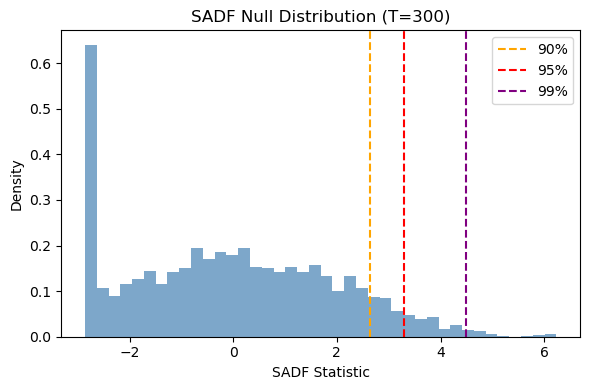

     Critical Value
90%        2.640919
95%        3.291431
99%        4.498912


beta =  [-0.00113926  0.24452043 -0.13355591  0.10284643  0.02140731 -0.07156846
  0.06685105  0.00685776  0.16392994  0.01955445 -0.11492439 -0.0154203
 -0.04185945 -0.17372699  0.03669231 -0.01773535  0.28077625 -0.0493398
  0.1393592   0.0287506  -0.00106538 -0.02988619  0.06790373 -0.08528853
 -0.01780106 -0.13987432  0.05145542  0.11259822  0.01184689  0.01293998
 -0.01659941  0.08235368  0.00921396  0.01519     0.09697284  0.14528963
 -0.01789732  0.07346404  0.02099247 -0.04470344  0.08021184 -0.04885085
 -0.03315303 -0.02036264  0.01332769  0.07823653 -0.08148398  0.10849447
 -0.04291768  0.06539728  0.02792436 -0.06221796 -0.08667131 -0.00488023
 -0.09799918  0.11803348 -0.09808154  0.05940038 -0.07856956 -0.00800624
  0.10319368  0.02086602  0.10590036  0.14748471  0.04016167  0.03521201
 -0.09766851  0.0081328  -0.00073733 -0.03924898 -0.08552675  0.0413682
  0.06266245  0.11633689  0.06839605 

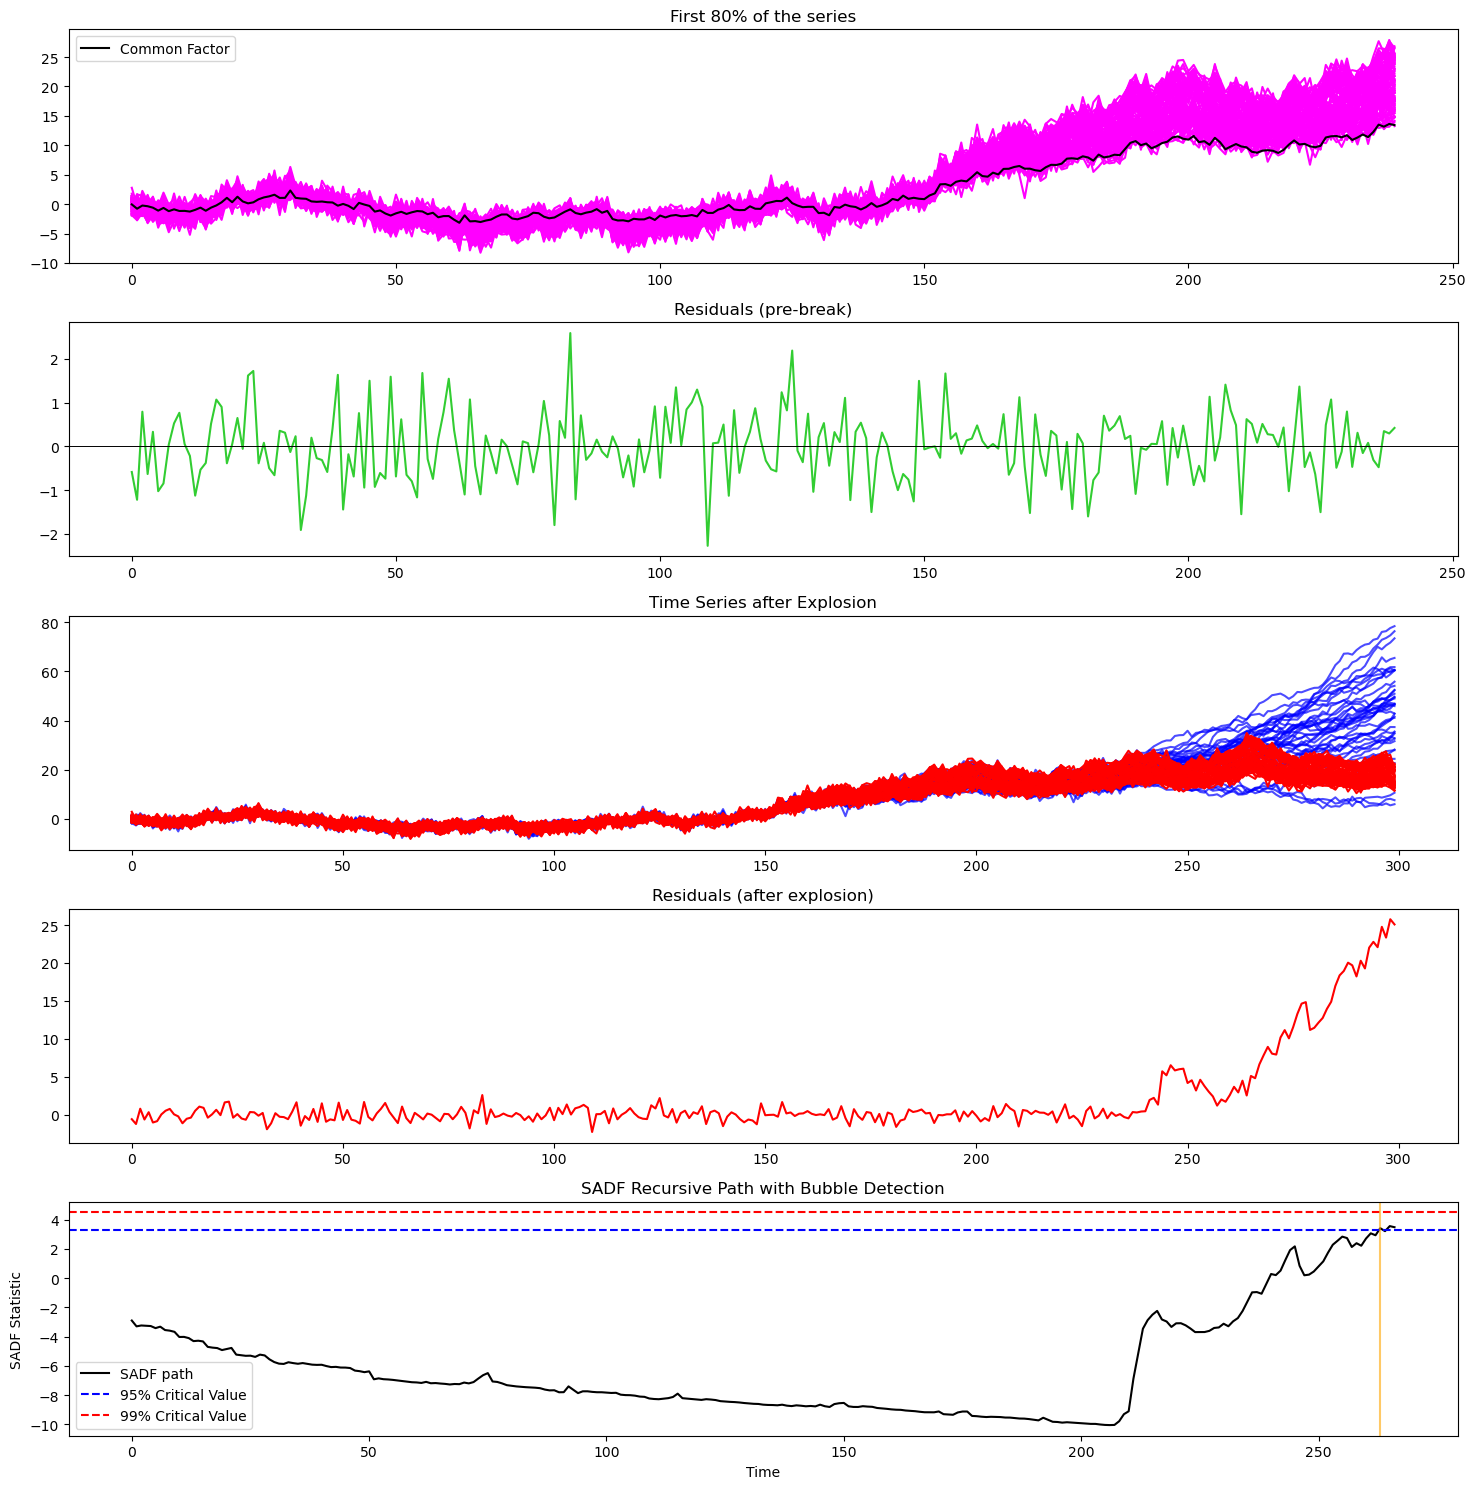

Time series is Explosive. SADF Value is: 3.56

Bubble starts at t=263
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [14]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

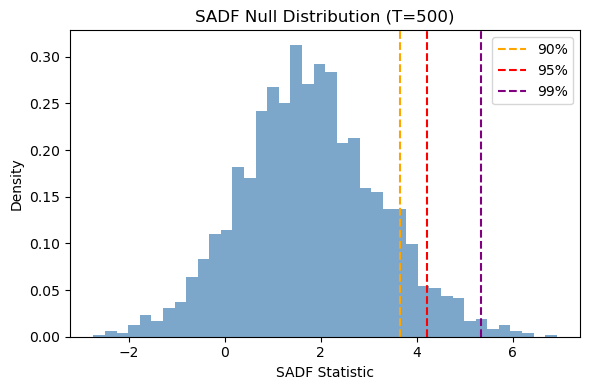

     Critical Value
90%        3.657670
95%        4.226457
99%        5.332479


beta =  [ 0.00799081  0.2420241  -0.12004484  0.12915504 -0.01655337 -0.06934862
  0.05127784  0.03833793  0.19649869  0.05810835 -0.04294548  0.01057774
 -0.05645351 -0.19693869  0.04932467  0.01024772  0.2218925  -0.05018683
  0.14451696  0.00141793 -0.01964583  0.04277337  0.08272716 -0.11744085
  0.02087945 -0.14291768 -0.00888368  0.14008491 -0.06518194 -0.04292242
 -0.08474903  0.04958098  0.03692893  0.07817758  0.09264189  0.16298955
 -0.0733652   0.02131528 -0.04459029  0.00354091  0.0370203  -0.0341389
 -0.04634162  0.01042462 -0.03284751  0.11772912 -0.09651759  0.09996782
 -0.14004059  0.01342141 -0.02169396 -0.03885034 -0.08985834 -0.01127377
 -0.11156482  0.06470643 -0.0884462   0.09734927 -0.08920332 -0.05197591
  0.08178762  0.03120823  0.21046284  0.06607826  0.04158185  0.0358165
 -0.01998061  0.07646237  0.09116907 -0.07468863  0.04102398  0.08893392
 -0.02413295  0.19480516  0.1122316 

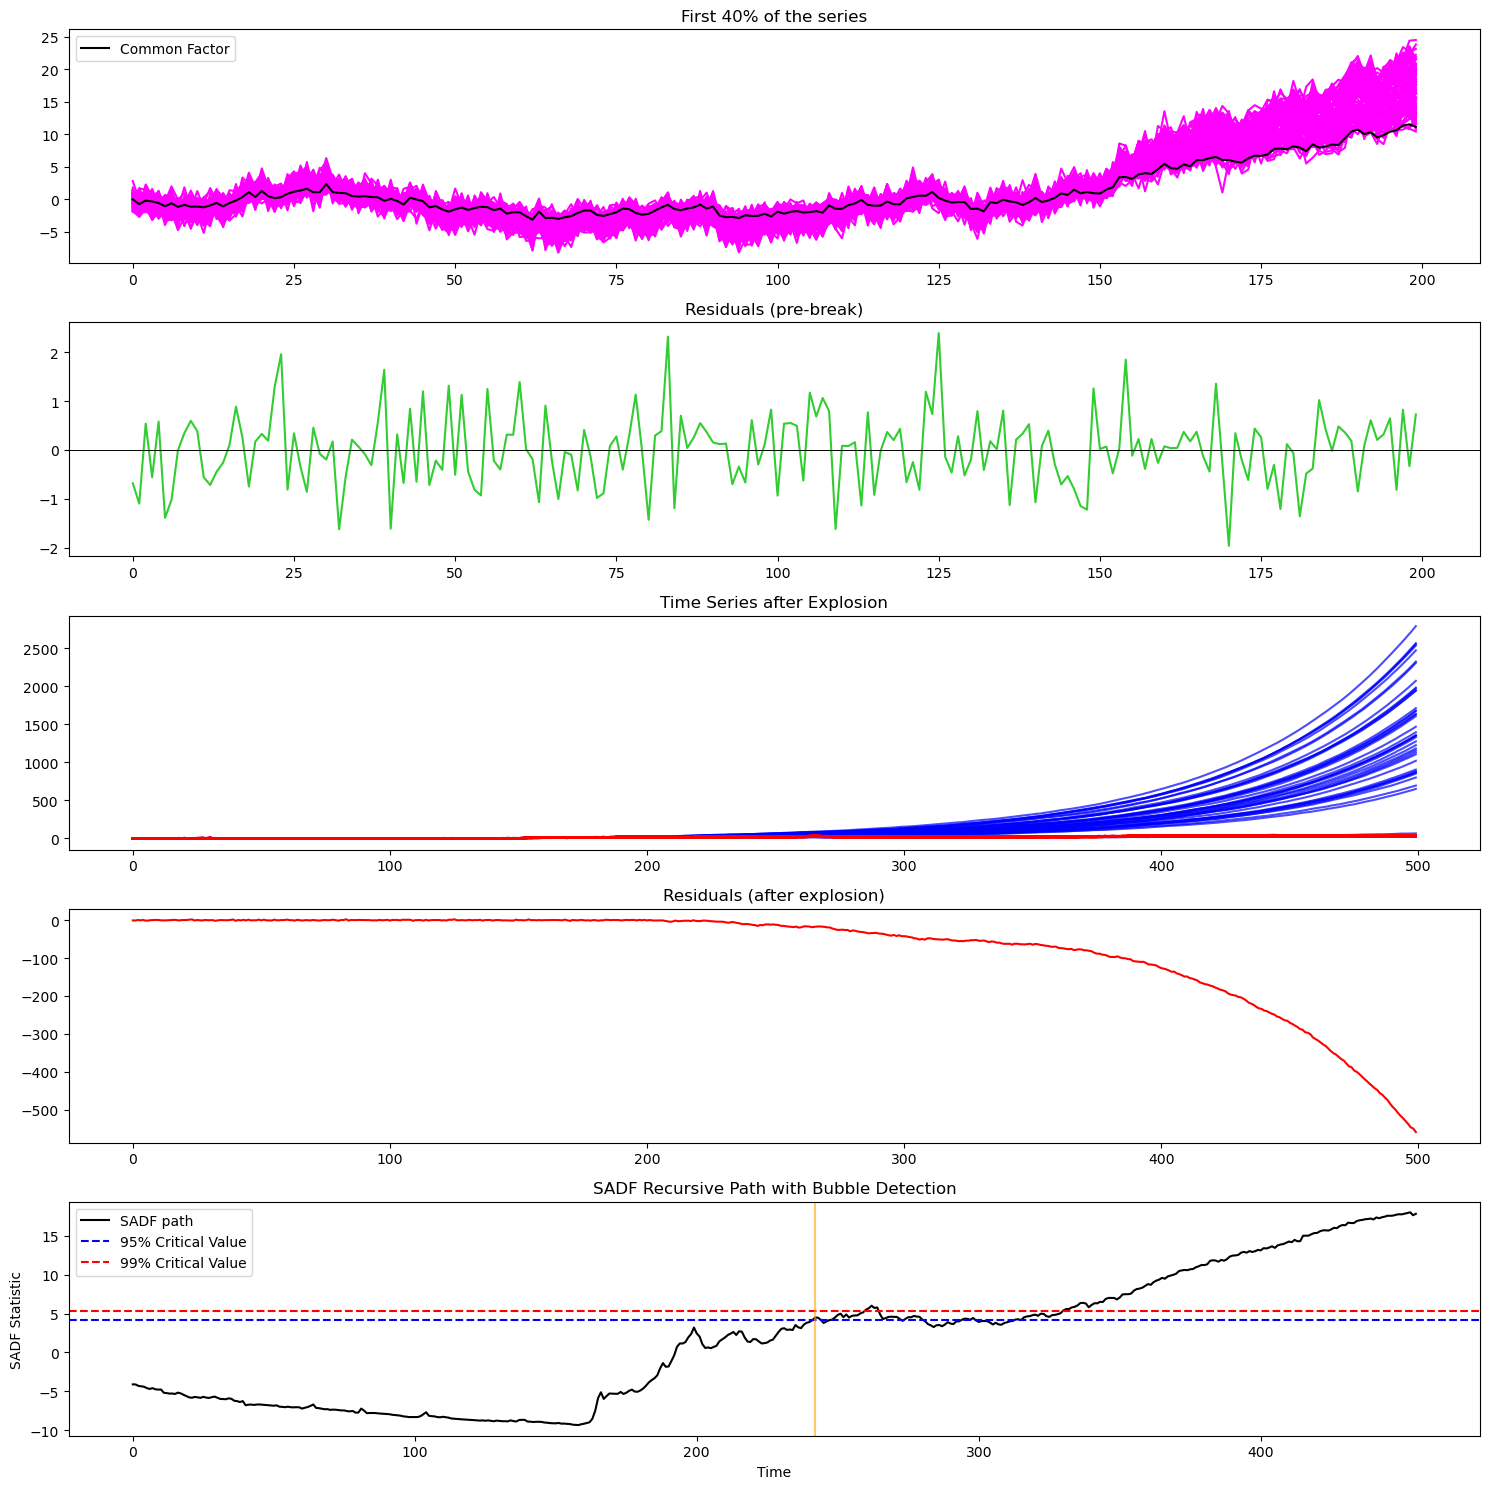

Time series is Explosive. SADF Value is: 18.02

Bubble starts at t=242
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [19]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [20]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

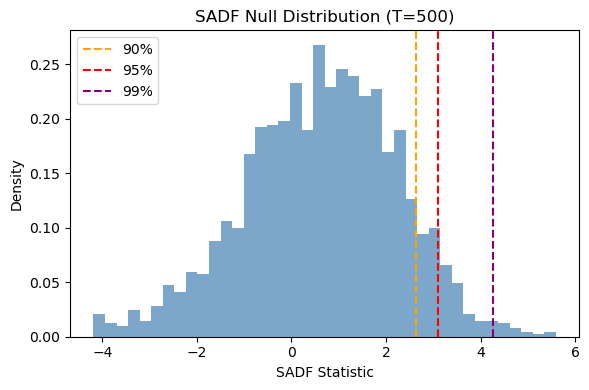

     Critical Value
90%        2.628786
95%        3.107970
99%        4.259484


beta =  [ 2.02908688e-02  1.26363649e-01 -1.18920919e-01  6.45783614e-02
  2.14133952e-03 -2.49430448e-02  7.68639192e-02  4.25293301e-02
  1.40670853e-01  3.61844799e-02 -4.40351672e-02  9.98314495e-03
 -7.91015746e-02 -3.02692449e-02  1.82115033e-02 -8.74433345e-03
  1.23517164e-01 -3.03096807e-02  8.58476025e-02  9.81842450e-02
 -2.94099508e-02 -8.44911578e-03  4.23677494e-02 -8.48704148e-02
 -4.50519717e-02 -9.33976459e-02  1.32175876e-01  1.03380042e-01
  4.77547449e-02 -2.86430505e-02 -6.77842084e-02  6.46038484e-02
  5.91122980e-02 -1.64803380e-02  6.39110121e-02  9.13224619e-02
  4.82032270e-02 -1.76864586e-03 -3.38175724e-02 -3.19500871e-02
 -4.62786756e-02  3.99956225e-02 -2.09098126e-02  5.14420363e-02
  3.13717561e-02  6.74729648e-02 -1.64007922e-01  4.33540425e-02
 -6.39144653e-02 -3.41466963e-02 -6.99166224e-03  6.22831992e-03
 -1.02125431e-01 -1.12787915e-04  2.02450790e-02  8.50943932e-02


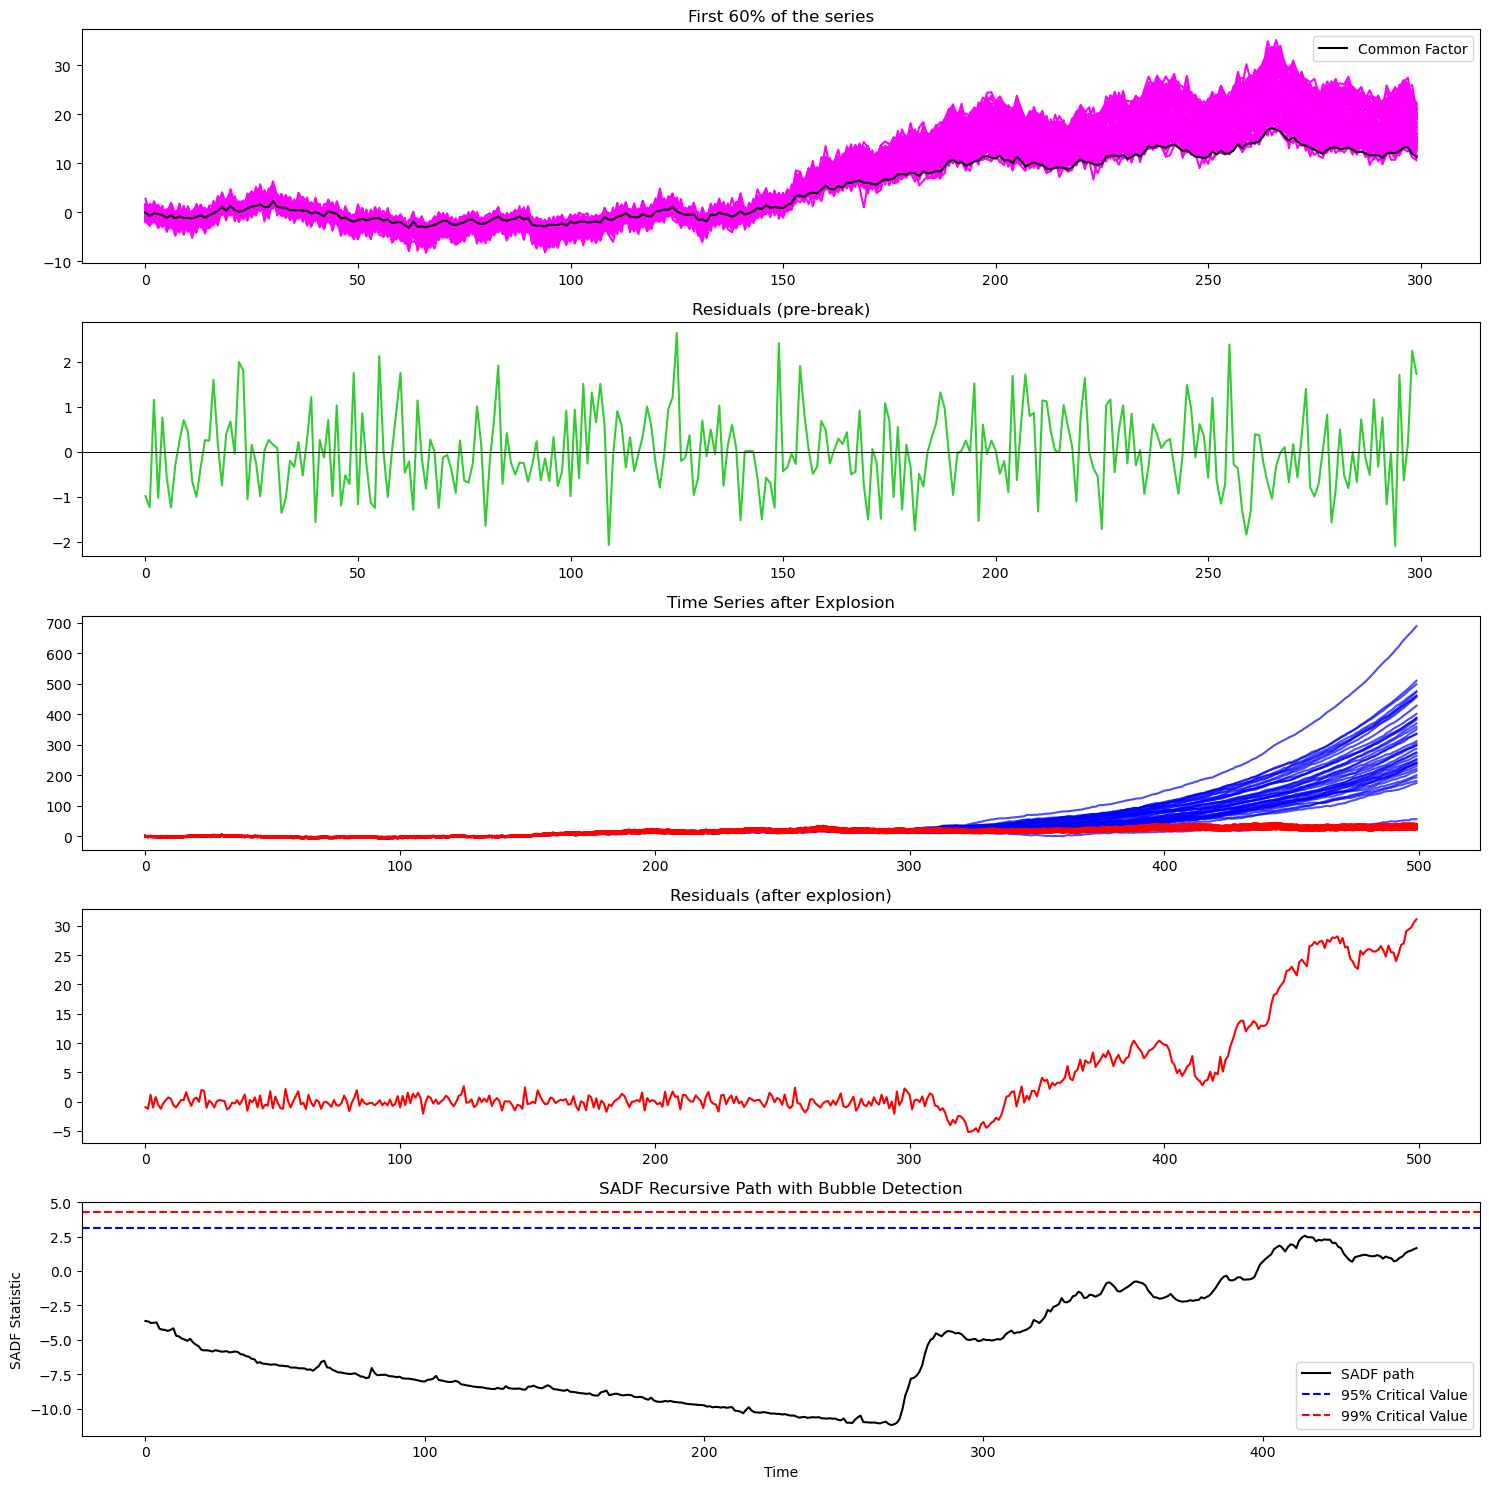

Time series is Non Explosive. SADF Value is: 2.56

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [21]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [22]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

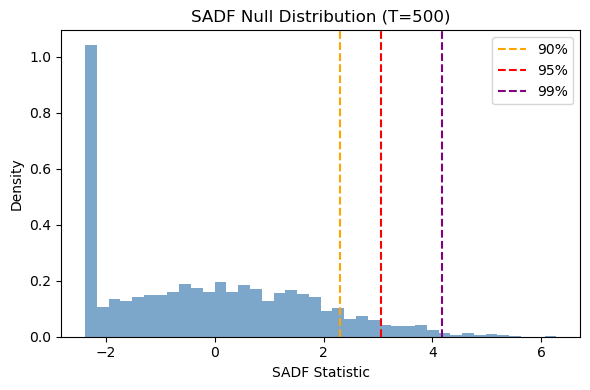

     Critical Value
90%        2.292178
95%        3.046501
99%        4.185035


beta =  [ 0.00817697  0.08968529 -0.09058478 -0.00312073 -0.03196427  0.01379148
  0.05229382 -0.04927929  0.13357072  0.02135966 -0.07023188  0.01328365
 -0.08653429 -0.05580869  0.00377291 -0.03898448  0.06691782 -0.0015618
  0.09588511  0.09867261  0.01704529  0.01508666  0.0311058  -0.08277371
  0.01542298 -0.06805934  0.09550768  0.06727838  0.06268921 -0.06023869
 -0.00809943  0.02429213  0.07024686 -0.00822671  0.07651919  0.02710499
  0.05155725 -0.01636623 -0.01554717 -0.04180822 -0.00954369 -0.02957541
  0.074057    0.11521589 -0.04798929  0.06544888 -0.03901803 -0.01363125
 -0.09712284 -0.0028349   0.01520511  0.02204824 -0.14162947  0.01110241
  0.07737871  0.09512255 -0.07685725 -0.07097137 -0.10203478 -0.05339487
  0.04893942  0.10380504 -0.00500413  0.07705315 -0.07129542  0.07572501
 -0.03619765  0.00836033  0.02825784 -0.00396188 -0.0192479   0.10987858
  0.06790355  0.02880274  0.0399058

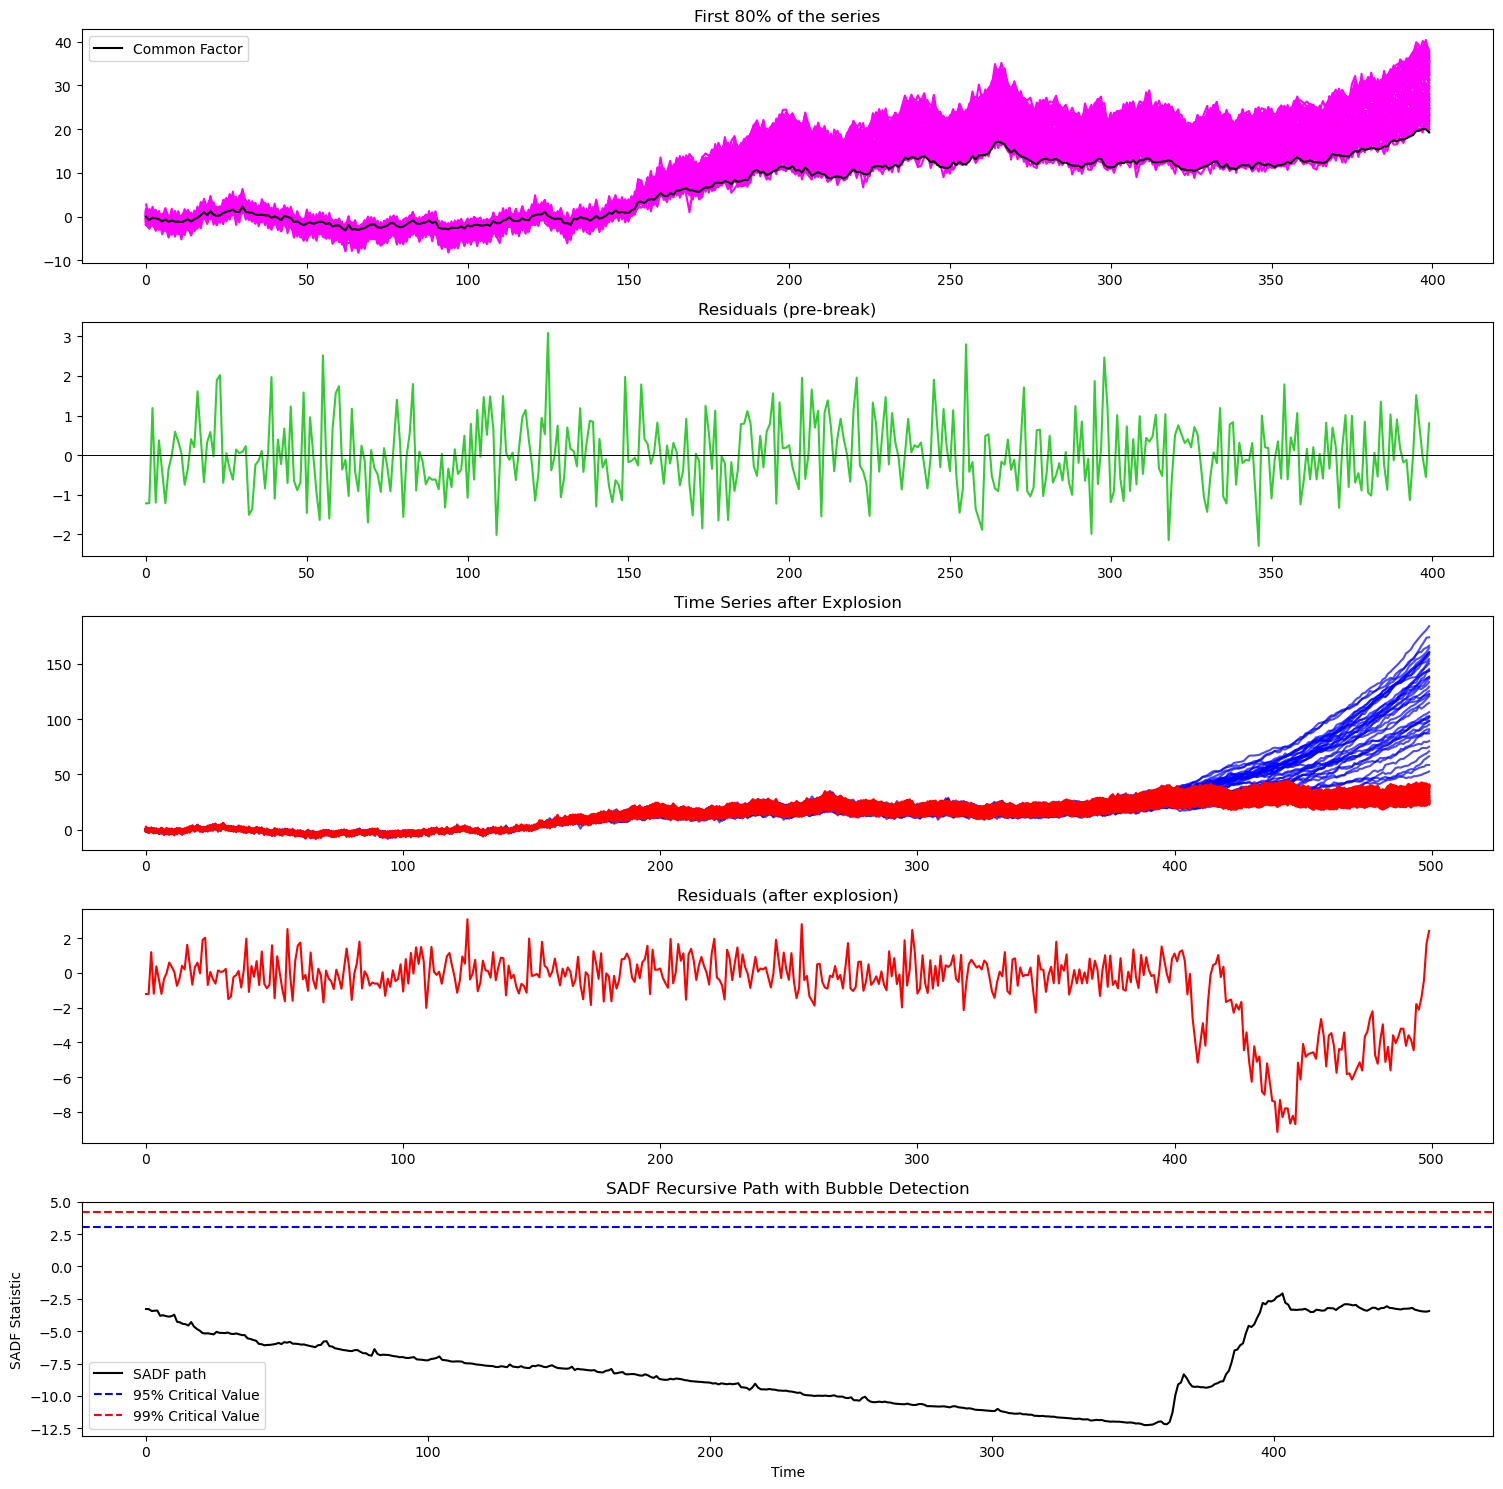

Time series is Non Explosive. SADF Value is: -2.08

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [23]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [25]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [26]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [27]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

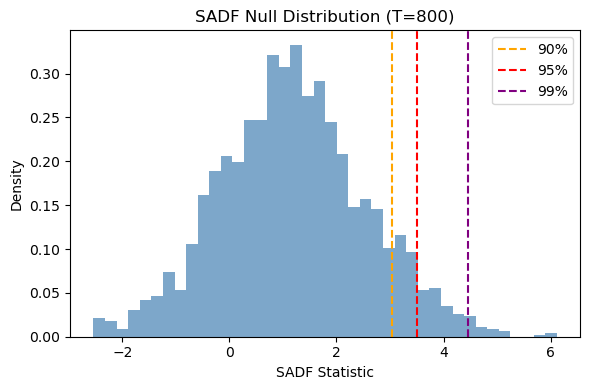

     Critical Value
90%        3.041885
95%        3.508191
99%        4.450872


beta =  [-0.02536602  0.08300846 -0.05940263  0.06431228 -0.02502449 -0.0184418
  0.08830961 -0.00724863  0.11837406  0.0337948  -0.04872288  0.02575851
 -0.10014491 -0.02765366  0.03525601 -0.02996826  0.12203375 -0.04050955
  0.09792832  0.12304102 -0.0182246  -0.00821811  0.0281341  -0.05585087
 -0.02678503 -0.09580656  0.13150276  0.09149365  0.03298277 -0.04411353
 -0.04667611  0.04806546  0.09260532 -0.01990836  0.09144703  0.07710018
  0.07445202  0.00712448 -0.00976067 -0.0450894  -0.02292115  0.02636101
  0.05346917  0.07429198 -0.0301991   0.06950428 -0.11612101 -0.00128523
 -0.07802067 -0.03150419 -0.00927931 -0.00079857 -0.13530119 -0.00578209
  0.01989487  0.07938482 -0.0256358  -0.05021303 -0.09550188 -0.02037364
  0.07754362  0.11053155  0.01189482  0.07513292 -0.07055835  0.02948313
 -0.0399415   0.02519846  0.04968397 -0.02018851 -0.05483974  0.11389404
  0.05959472  0.00552139  0.0629445

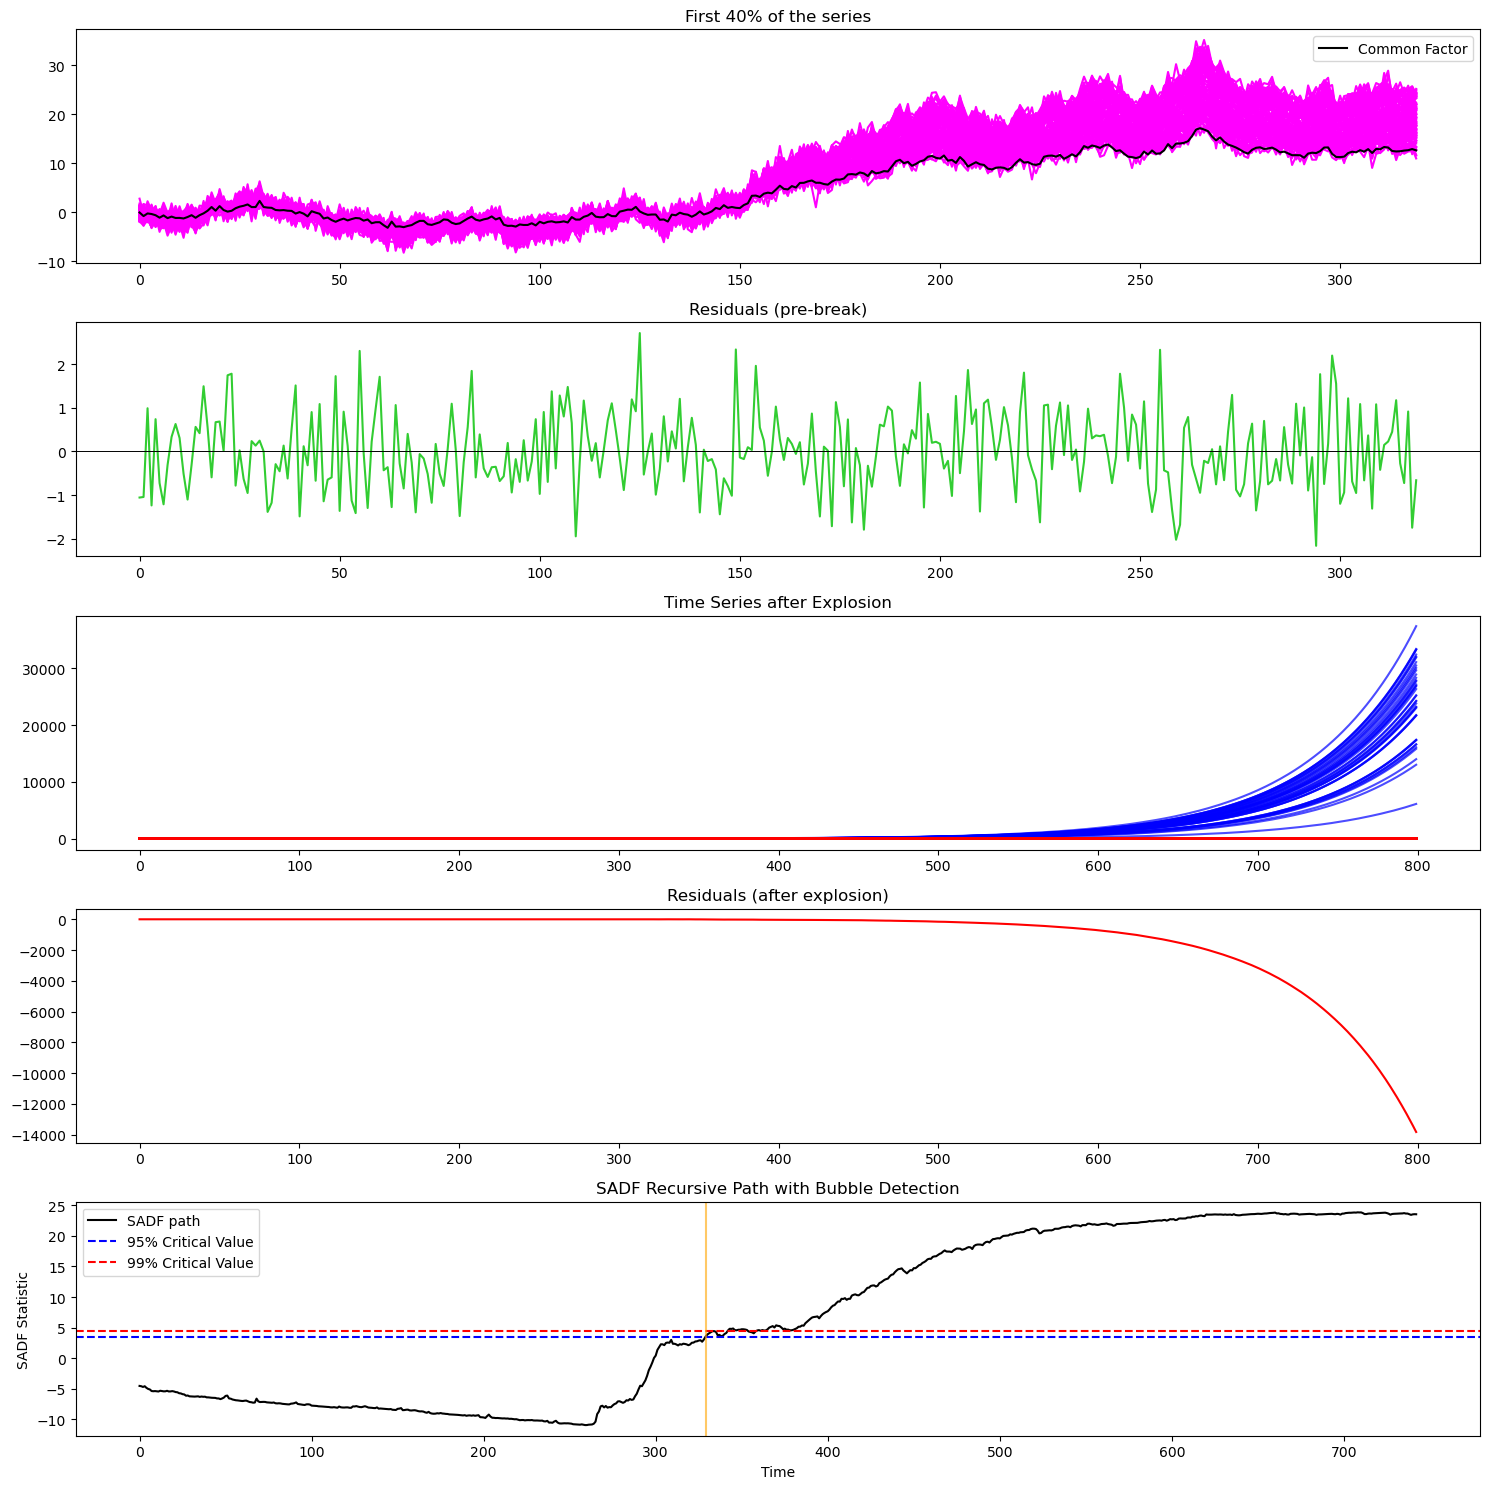

Time series is Explosive. SADF Value is: 23.87

Bubble starts at t=329
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [28]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [29]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

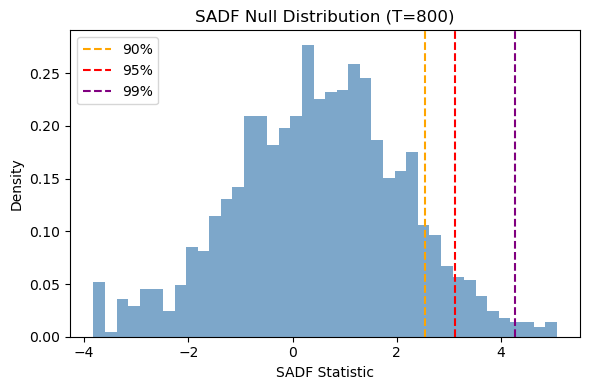

     Critical Value
90%        2.532680
95%        3.121015
99%        4.259347


beta =  [-0.00223151  0.05906643 -0.04546182  0.00262196  0.00555764 -0.0412807
  0.06223752 -0.01899552  0.14665067  0.02084453 -0.04821005  0.02524661
 -0.05949481 -0.02924738  0.02983037 -0.04039106  0.03546686 -0.00209388
  0.07618372  0.04673309 -0.01442072 -0.02593863 -0.01808271 -0.04129187
  0.00888243 -0.04416761  0.0908881   0.07703424  0.04441092 -0.09111183
  0.00463534  0.02891082  0.06431066 -0.03073092  0.04811154  0.01945628
  0.05304209  0.00254906 -0.03244796 -0.02542644  0.00257515 -0.01305927
  0.02367365  0.07287543 -0.04319746  0.05418965 -0.02681538  0.00967294
 -0.06517025 -0.01117865  0.01794003  0.04117285 -0.11920796  0.02175776
  0.07176641  0.10509996 -0.07302041 -0.04907682 -0.07325387 -0.05509075
  0.03818351  0.11679135 -0.01170812  0.03265968 -0.02869386  0.0753321
 -0.04174124  0.03590212  0.03420581 -0.01390877 -0.00219746  0.07292624
  0.05070853  0.04486591  0.05596978

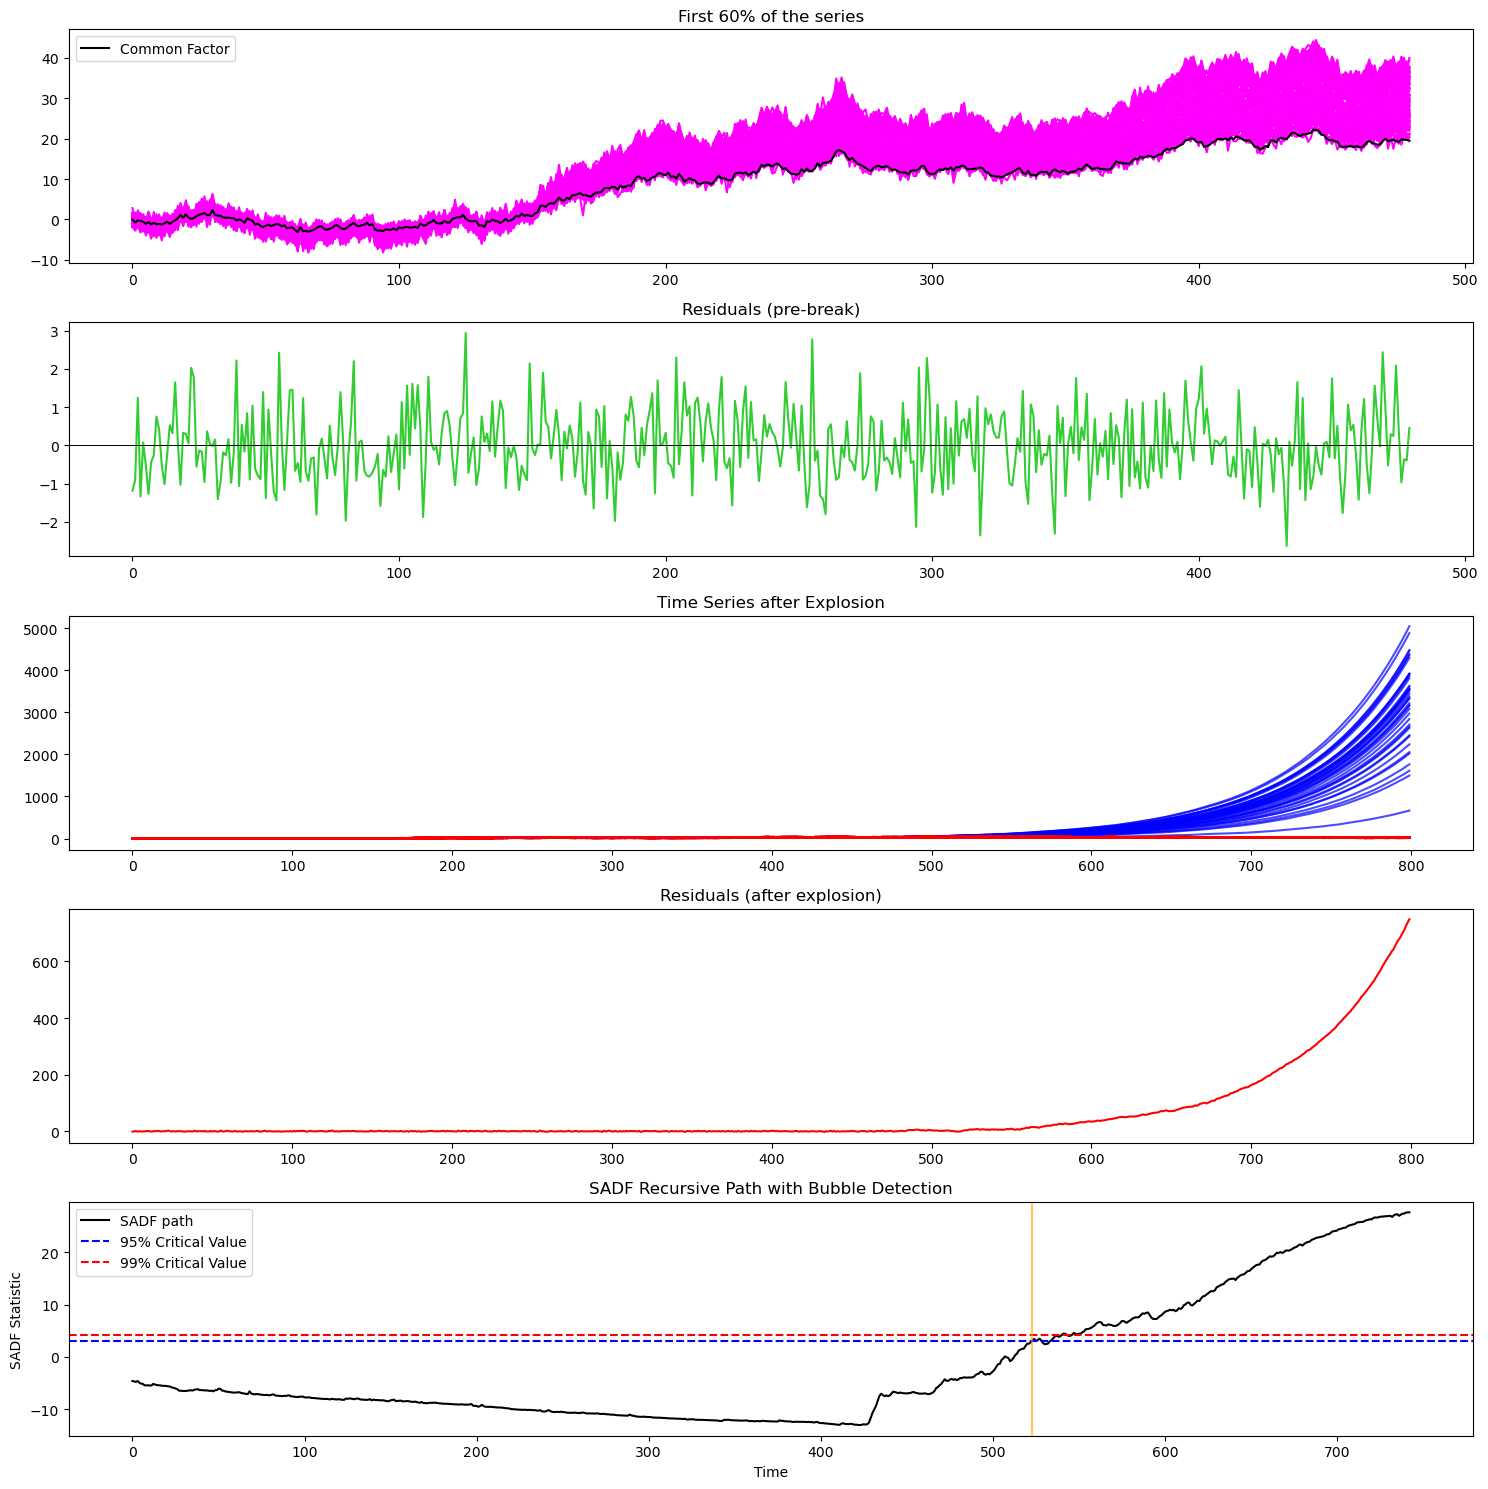

Time series is Explosive. SADF Value is: 27.68

Bubble starts at t=523
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [31]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

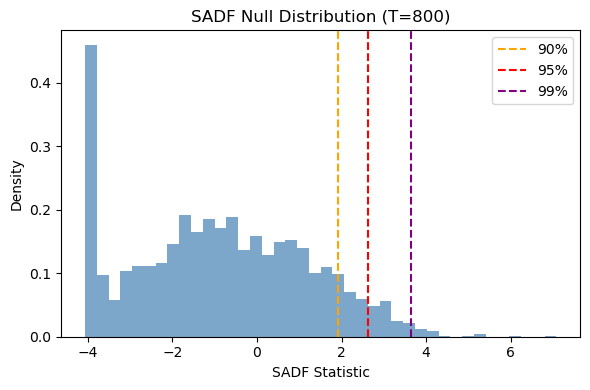

     Critical Value
90%        1.920451
95%        2.624179
99%        3.639018


beta =  [-0.0328992   0.07704264 -0.03965897 -0.0107133  -0.0114891  -0.03775791
  0.00436559  0.06048255  0.07390686  0.03778306 -0.02496804  0.01893577
 -0.05031568 -0.05153491  0.0176522  -0.01284618  0.05552345  0.00972028
  0.07919641  0.00363107 -0.01478129 -0.00285914 -0.01056936 -0.0219574
  0.04840992 -0.05071159  0.08145057  0.07176071  0.05093911 -0.08631518
 -0.00869333 -0.01015882  0.01846272 -0.02217256  0.05777088  0.01845649
  0.03309683  0.00512903 -0.03702985  0.02153464 -0.01170334 -0.01562121
  0.0168321   0.03306494  0.00702546  0.04433046 -0.00987771  0.03852086
 -0.03338655  0.02269913 -0.00852934  0.04732597 -0.08605622  0.04100258
  0.03594108  0.10477046 -0.07285399 -0.02383745 -0.03724324 -0.0364992
  0.03485617  0.09727615 -0.01619468 -0.01611279 -0.0115037   0.04065299
 -0.05890305  0.00824067 -0.00168288  0.01298576  0.02864861  0.08392906
  0.04342568  0.02883951  0.03956257

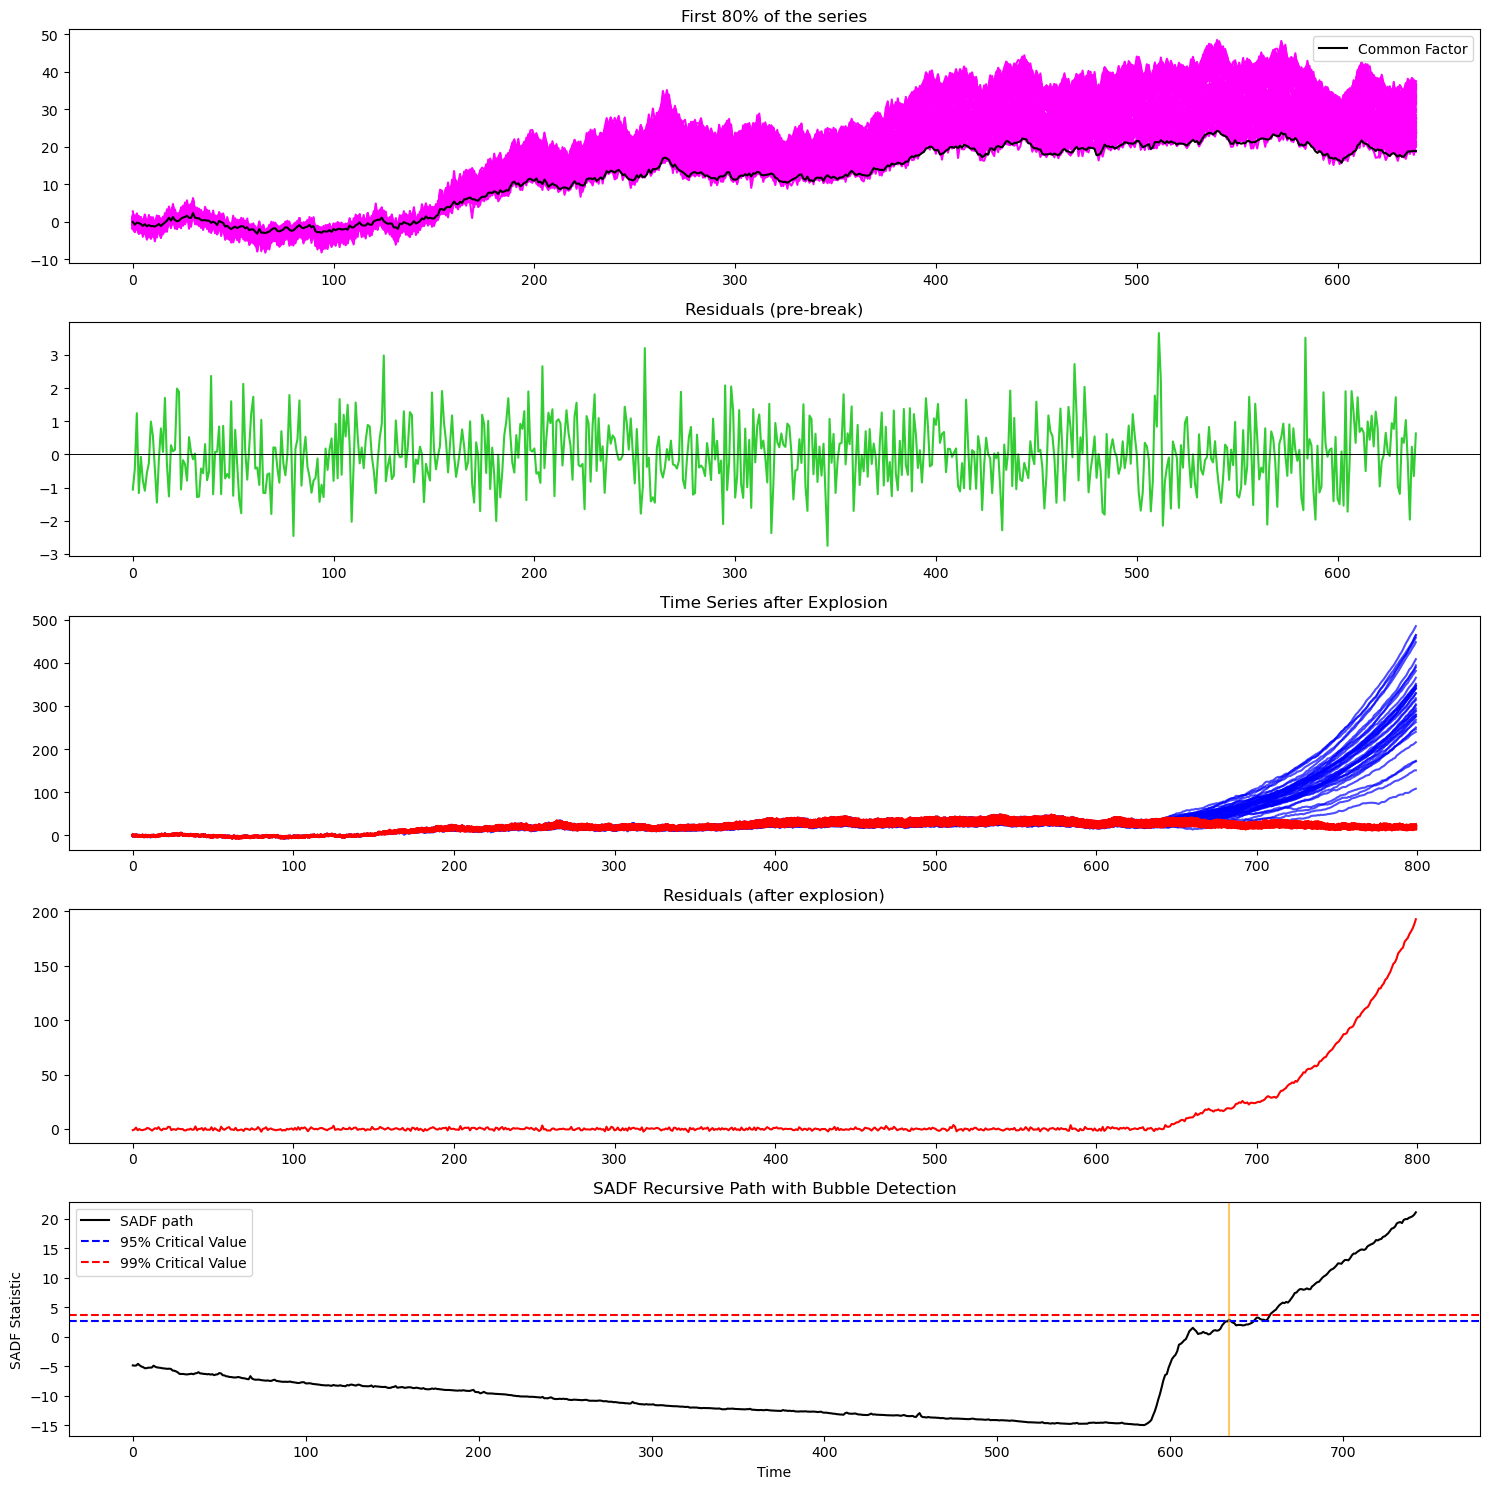

Time series is Explosive. SADF Value is: 21.11

Bubble starts at t=634
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

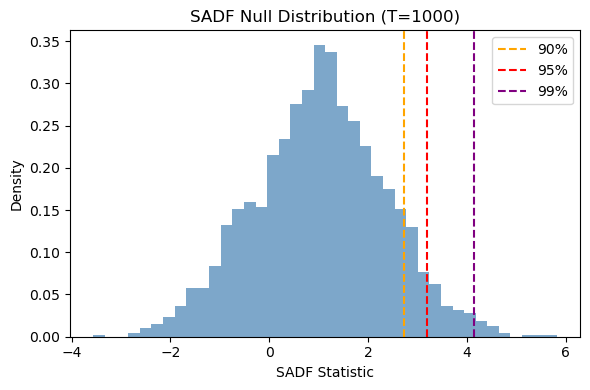

     Critical Value
90%        2.736599
95%        3.203160
99%        4.146061


beta =  [ 0.00817697  0.08968529 -0.09058478 -0.00312073 -0.03196427  0.01379148
  0.05229382 -0.04927929  0.13357072  0.02135966 -0.07023188  0.01328365
 -0.08653429 -0.05580869  0.00377291 -0.03898448  0.06691782 -0.0015618
  0.09588511  0.09867261  0.01704529  0.01508666  0.0311058  -0.08277371
  0.01542298 -0.06805934  0.09550768  0.06727838  0.06268921 -0.06023869
 -0.00809943  0.02429213  0.07024686 -0.00822671  0.07651919  0.02710499
  0.05155725 -0.01636623 -0.01554717 -0.04180822 -0.00954369 -0.02957541
  0.074057    0.11521589 -0.04798929  0.06544888 -0.03901803 -0.01363125
 -0.09712284 -0.0028349   0.01520511  0.02204824 -0.14162947  0.01110241
  0.07737871  0.09512255 -0.07685725 -0.07097137 -0.10203478 -0.05339487
  0.04893942  0.10380504 -0.00500413  0.07705315 -0.07129542  0.07572501
 -0.03619765  0.00836033  0.02825784 -0.00396188 -0.0192479   0.10987858
  0.06790355  0.02880274  0.0399058

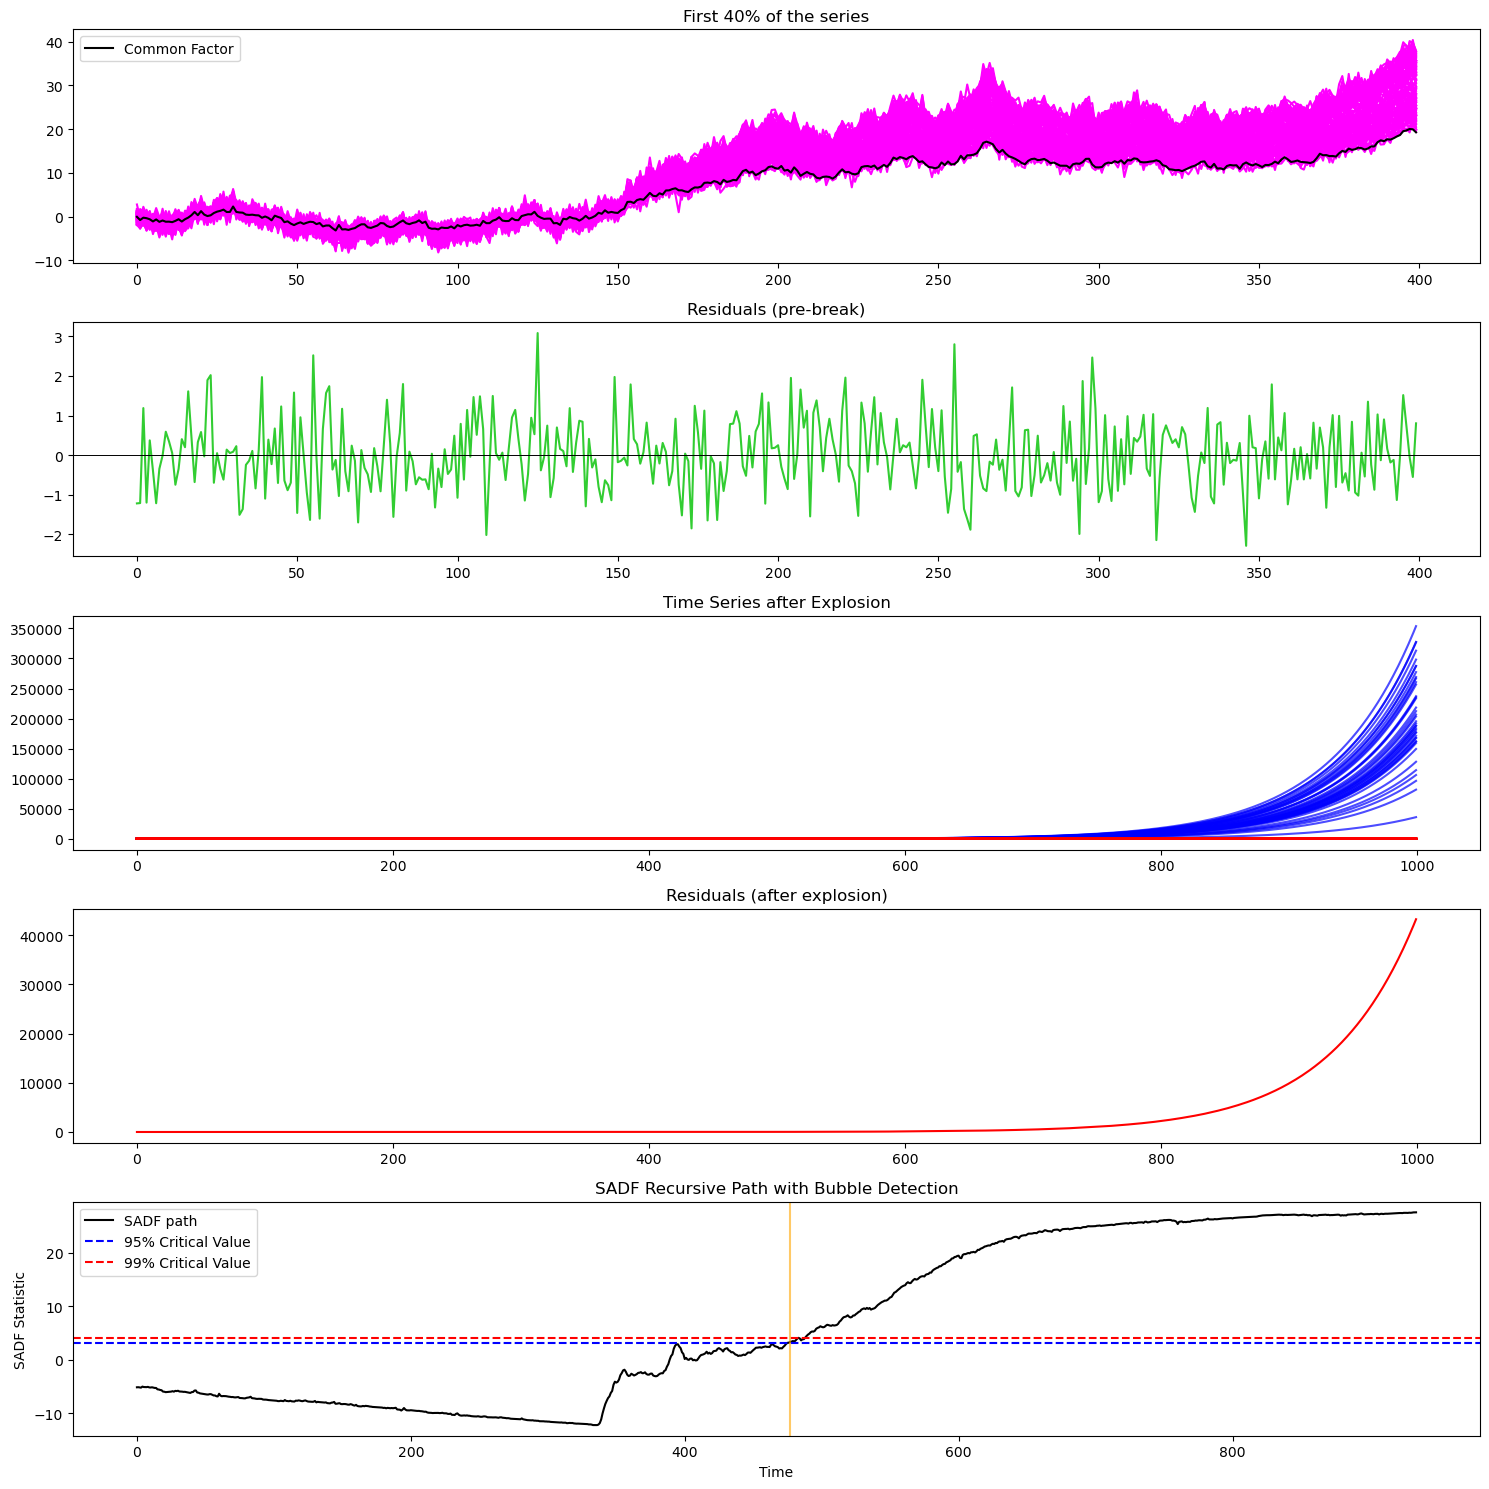

Time series is Explosive. SADF Value is: 27.6

Bubble starts at t=477
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [38]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

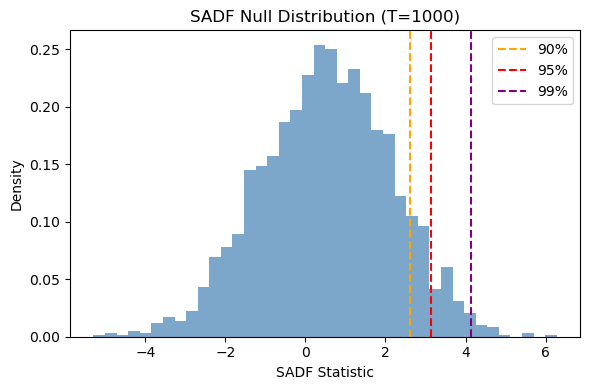

     Critical Value
90%        2.616253
95%        3.148382
99%        4.143086


beta =  [-0.0162591   0.07305271 -0.04164376 -0.01929805 -0.02052573 -0.04023743
  0.00450198  0.05585476  0.09019907  0.047492   -0.03350036  0.03678202
 -0.07924163 -0.04017672  0.02489161 -0.0160551   0.04039818  0.01523693
  0.05675723  0.01934468 -0.03693471 -0.0085217  -0.01191615 -0.02370055
  0.03753589 -0.04308201  0.08129642  0.08076886  0.04552316 -0.07809774
  0.00053315  0.00255163  0.03886282 -0.00568823  0.03695178  0.02132797
  0.02123736 -0.00721653 -0.04985853 -0.00538999  0.00669968 -0.00536733
  0.00744299  0.04667703 -0.02376526  0.03064466 -0.02046866  0.0373837
 -0.03782274  0.0368153  -0.02777486  0.04388511 -0.09498286  0.02085504
  0.04745565  0.0982161  -0.05551789 -0.04488851 -0.03400392 -0.02621853
  0.02742337  0.11365132 -0.00478842  0.00515423 -0.01076634  0.05363894
 -0.06315781  0.0100754  -0.00092428 -0.01562509  0.02122127  0.07893168
  0.05763091  0.04186013  0.0382798

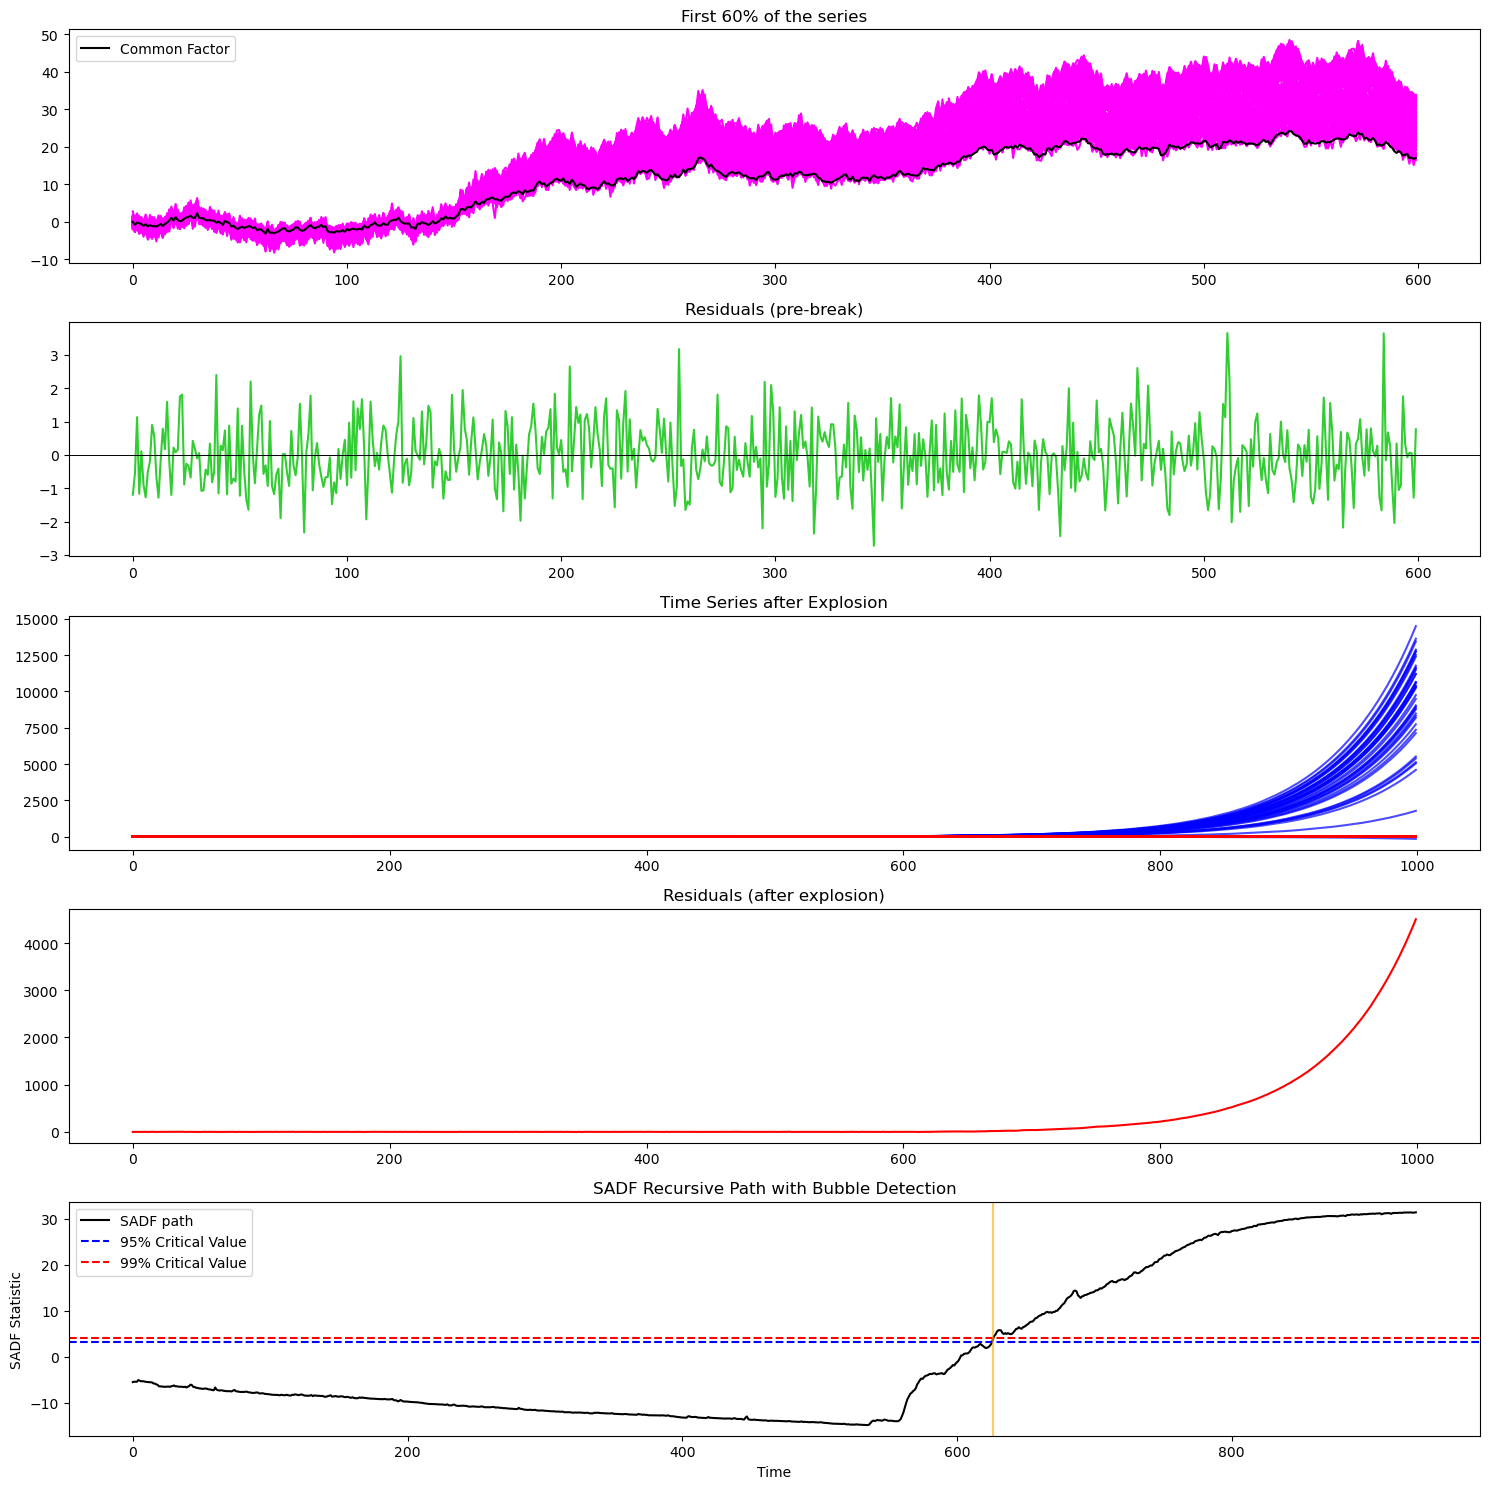

Time series is Explosive. SADF Value is: 31.38

Bubble starts at t=626
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

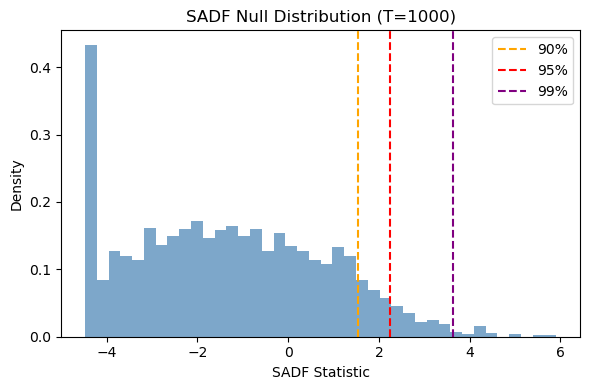

     Critical Value
90%        1.539235
95%        2.237937
99%        3.621718


beta =  [-0.04023323  0.04363735 -0.04924221 -0.01643098  0.00766392 -0.03505105
 -0.00904509  0.05700637  0.04136962  0.0661236  -0.0149293   0.03434892
 -0.04281825 -0.05867483  0.06686674 -0.00678212  0.05399644  0.03728414
  0.06162929  0.01336167 -0.00484584  0.01824112  0.01712608 -0.0175752
  0.03761533 -0.05512345  0.10290767  0.05034239  0.0763643  -0.04964111
 -0.02930162 -0.05547902  0.02708783 -0.04548478  0.01518889 -0.01384247
  0.04799858  0.02980917 -0.06165677  0.04362734  0.02362989  0.01191026
 -0.00564498  0.04304433  0.01029856  0.02357481  0.00033628  0.04077622
 -0.02170117  0.01930505  0.00022505  0.03260491 -0.06361359  0.01812757
  0.04150187  0.09718315 -0.0641678  -0.01725788 -0.0256334  -0.02142436
  0.01568536  0.07224258  0.00337411 -0.01741678 -0.01931973  0.05320849
 -0.06922952  0.01093325  0.00701388 -0.00867064  0.03371558  0.06689073
  0.04935008  0.008836   -0.0167314

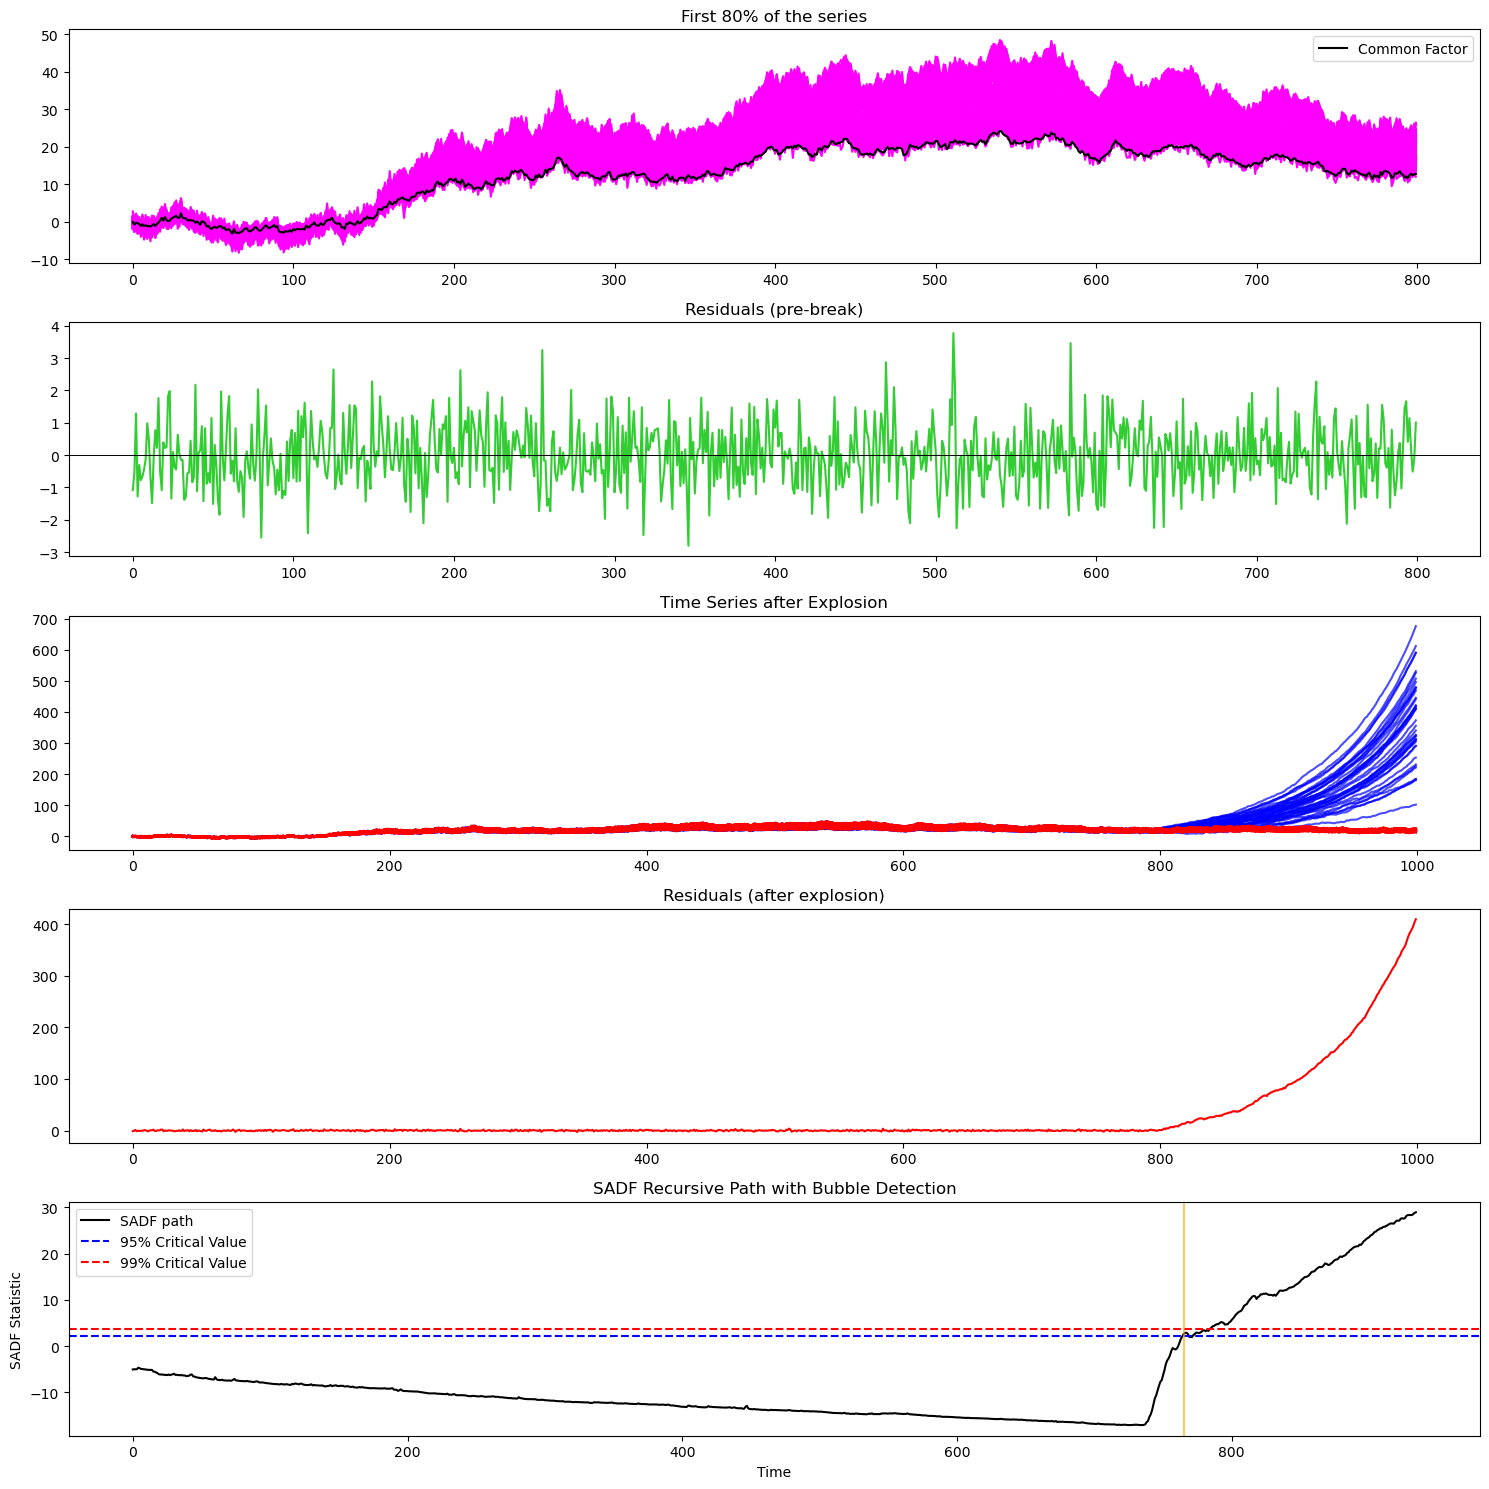

Time series is Explosive. SADF Value is: 28.93

Bubble starts at t=765
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

### Number of Bubble Series 60%

In [43]:
num_of_rw = 0.6

## N = 300

In [45]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [46]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

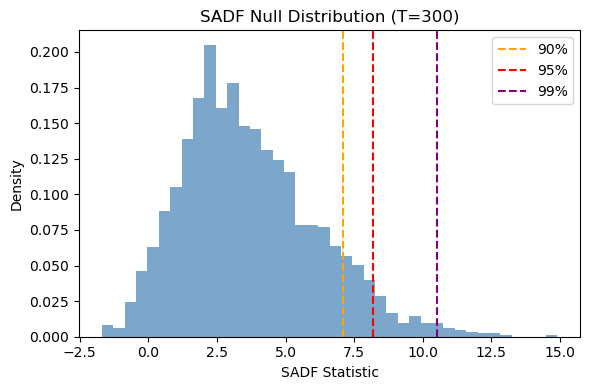

     Critical Value
90%        7.100747
95%        8.183319
99%       10.513901


beta =  [-2.24660402e-02  3.40466141e-01 -2.52759806e-01  5.07102544e-01
  2.04997176e-01 -1.54370132e-02 -2.75794874e-02 -1.48302737e-02
  6.69109094e-02 -8.88523658e-02 -1.96343561e-01  3.83649254e-02
 -7.29909612e-02 -4.99225032e-02  5.14068901e-02 -2.22305028e-02
  2.58676684e-01 -1.10995400e-01 -7.56488258e-02 -3.63804576e-01
 -2.09271727e-01  1.79425575e-01  2.64192993e-01 -4.12662009e-01
  1.46021133e-01  1.87242824e-02 -2.69878372e-01 -9.48738988e-02
 -1.36789499e-01  3.05112598e-02 -2.84026161e-01  1.95192770e-01
  2.05259904e-01  2.73337686e-01 -7.42173137e-02  2.44209373e-01
 -9.26111482e-02 -1.50815286e-01 -4.02140224e-01  2.33649627e-01
  2.83747517e-01  2.33183045e-01 -2.71956624e-01 -1.96079415e-01
  1.55790636e-01  1.59066344e-01 -1.29491401e-01  2.32260038e-01
 -7.73929634e-02  3.27782785e-01 -3.90387044e-02 -3.07639635e-01
 -1.99822419e-01  1.45309971e-01  5.27000381e-02 -4.68082086e-04


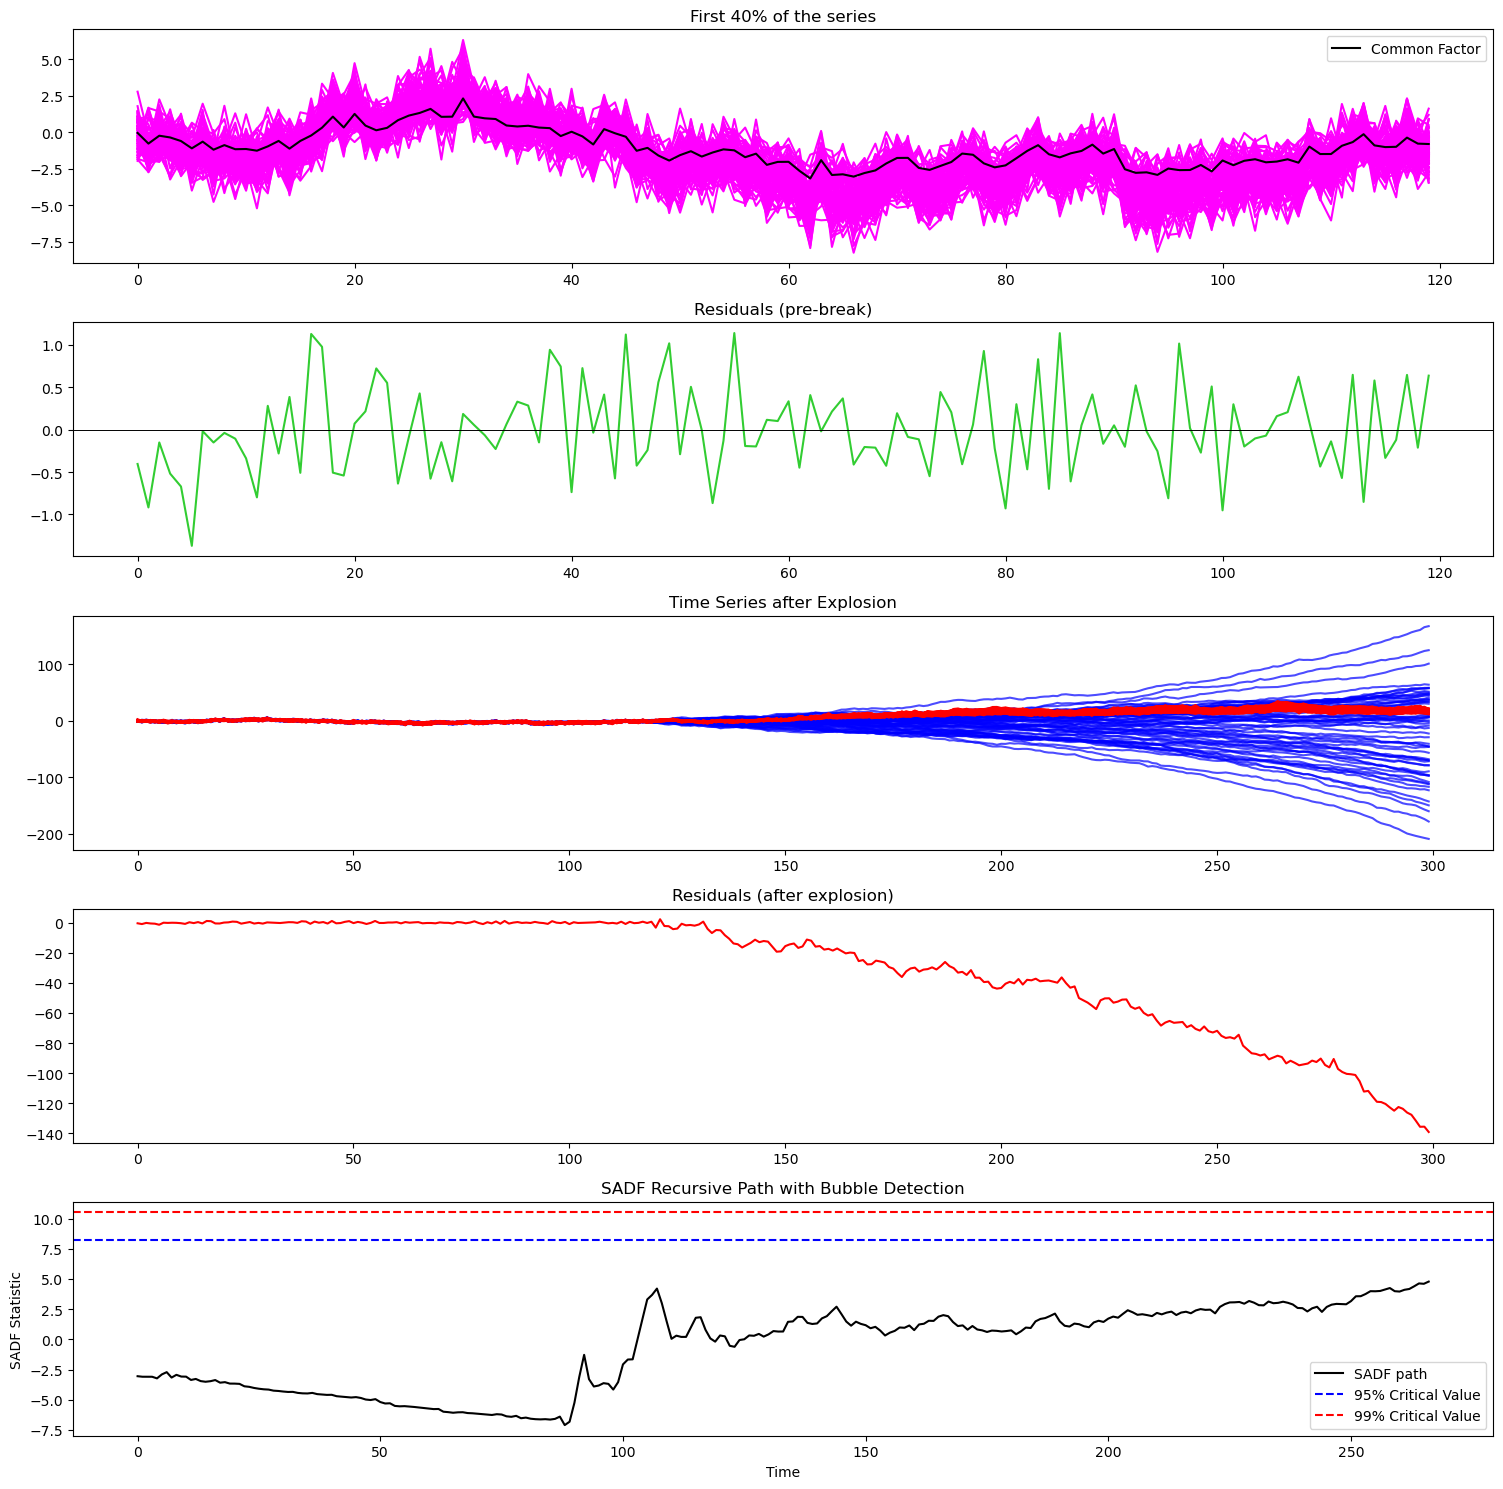

Time series is Non Explosive. SADF Value is: 4.78

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [47]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

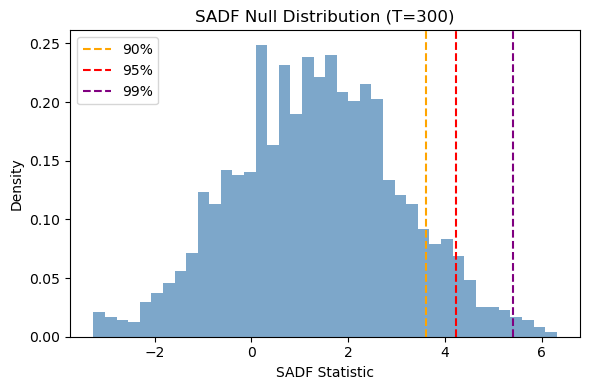

     Critical Value
90%        3.604209
95%        4.229239
99%        5.403243


beta =  [ 0.07125114  0.23138246 -0.10296481  0.1014295   0.06635642 -0.06820031
  0.05383862  0.10177927  0.20511455  0.12140836 -0.0686712  -0.05384481
 -0.15495692 -0.219533    0.03444741 -0.00280287  0.19566175 -0.08039452
  0.17467044 -0.03911115  0.03079641  0.05262059  0.06533011 -0.06314337
  0.01956543 -0.10776849  0.01144001  0.07583128 -0.08476431 -0.05937995
 -0.12619066  0.05016379 -0.0006327   0.10887461  0.09503542  0.15843979
 -0.04570423  0.07915934 -0.08582839  0.00745083  0.0783053  -0.05485043
 -0.02418675 -0.0112446  -0.03548291  0.14513877 -0.09219877  0.13214062
 -0.18089306  0.00471459 -0.0362218  -0.03066079 -0.15706015  0.0076877
 -0.07820721  0.09366788 -0.0835952   0.07257056 -0.06855017 -0.04037972
  0.04081762  0.01352036  0.19315577  0.05268443 -0.00830088  0.00200813
 -0.00199043  0.10657953  0.17587974 -0.08504294  0.01865228  0.05716683
 -0.02242534  0.1953104   0.1455463

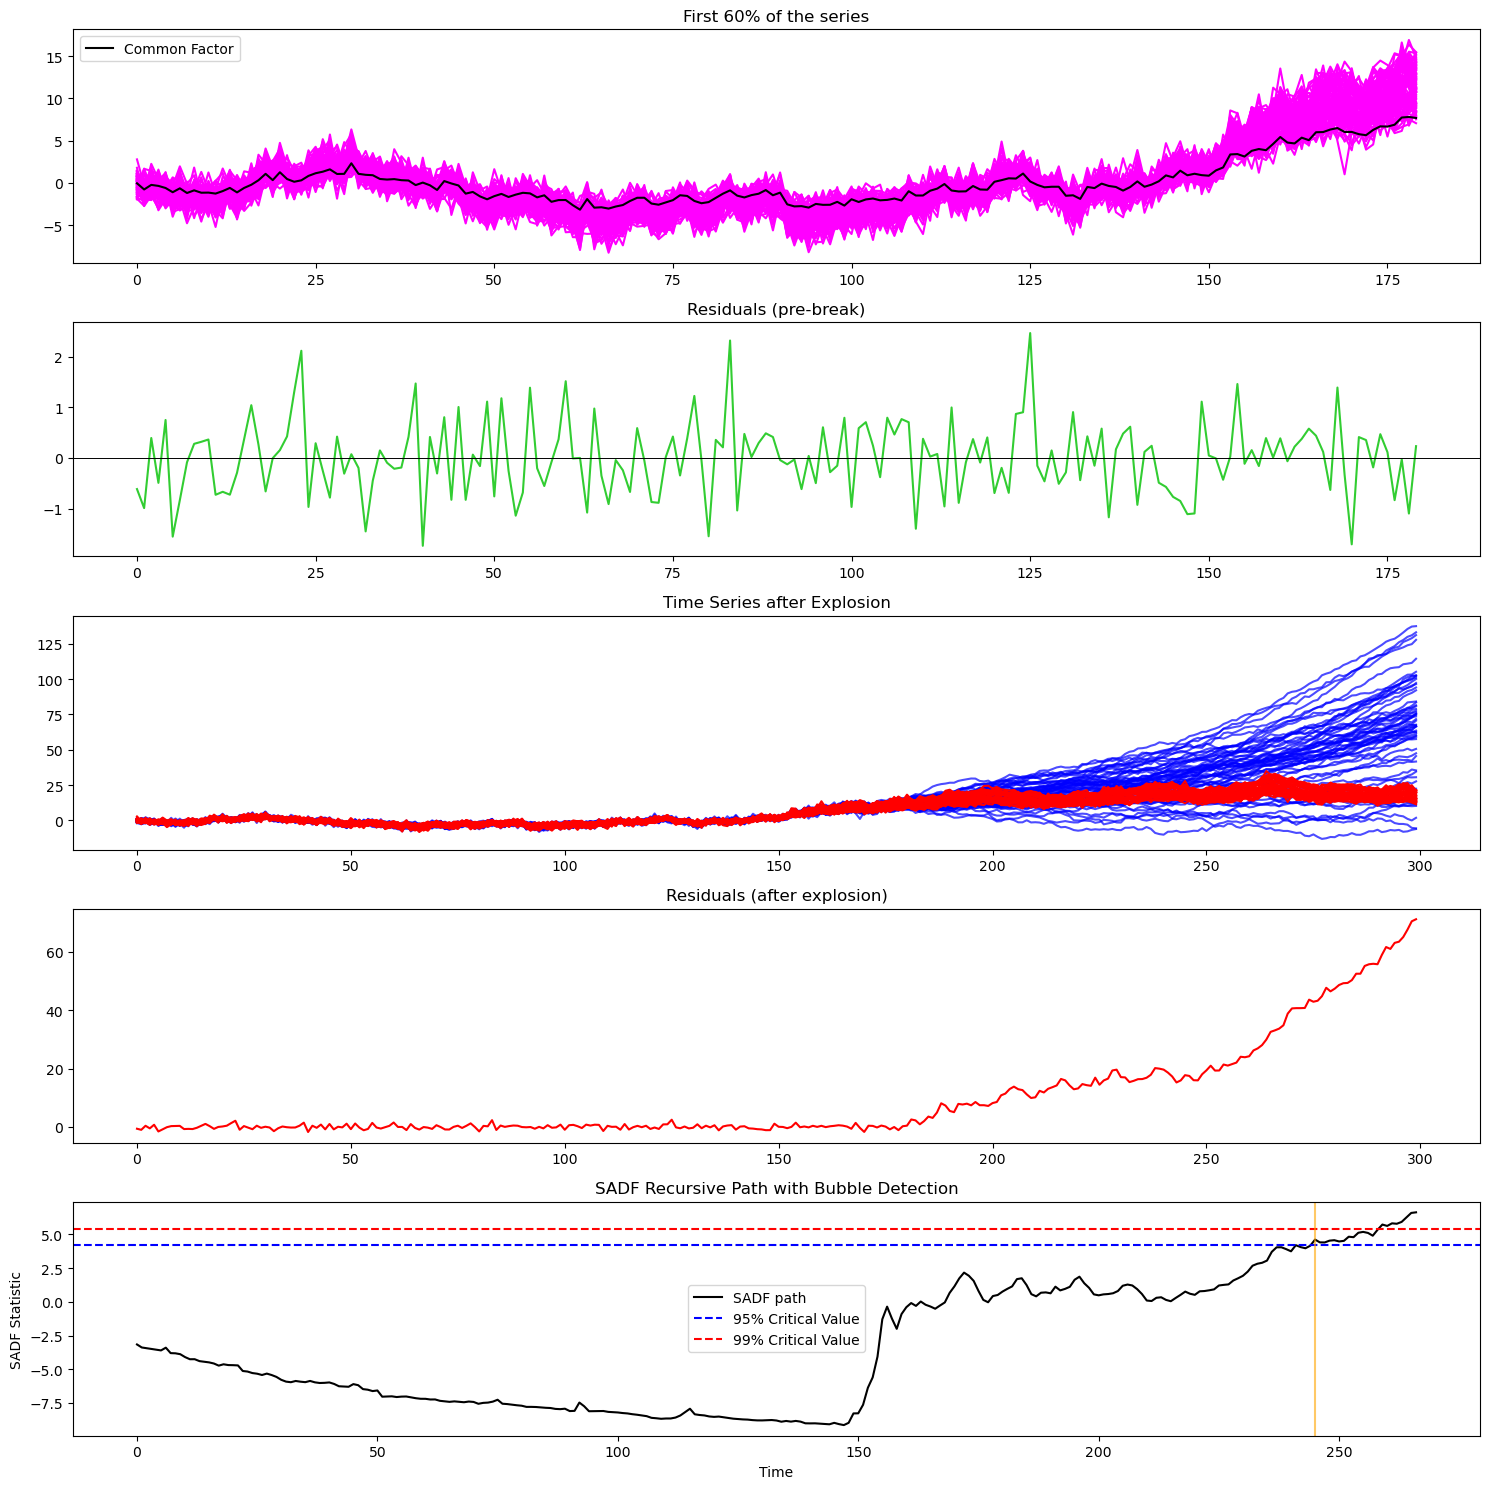

Time series is Explosive. SADF Value is: 6.65

Bubble starts at t=245
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [48]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

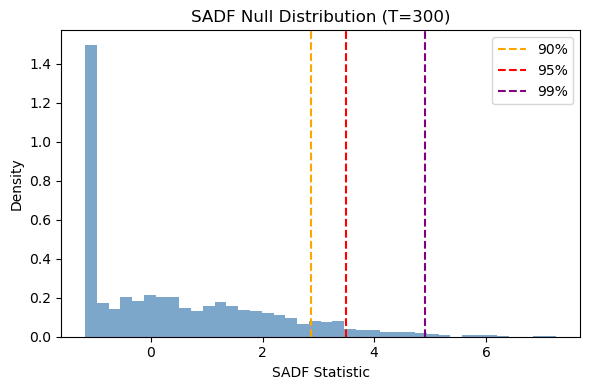

     Critical Value
90%        2.861282
95%        3.494329
99%        4.901429


beta =  [-0.00113926  0.24452043 -0.13355591  0.10284643  0.02140731 -0.07156846
  0.06685105  0.00685776  0.16392994  0.01955445 -0.11492439 -0.0154203
 -0.04185945 -0.17372699  0.03669231 -0.01773535  0.28077625 -0.0493398
  0.1393592   0.0287506  -0.00106538 -0.02988619  0.06790373 -0.08528853
 -0.01780106 -0.13987432  0.05145542  0.11259822  0.01184689  0.01293998
 -0.01659941  0.08235368  0.00921396  0.01519     0.09697284  0.14528963
 -0.01789732  0.07346404  0.02099247 -0.04470344  0.08021184 -0.04885085
 -0.03315303 -0.02036264  0.01332769  0.07823653 -0.08148398  0.10849447
 -0.04291768  0.06539728  0.02792436 -0.06221796 -0.08667131 -0.00488023
 -0.09799918  0.11803348 -0.09808154  0.05940038 -0.07856956 -0.00800624
  0.10319368  0.02086602  0.10590036  0.14748471  0.04016167  0.03521201
 -0.09766851  0.0081328  -0.00073733 -0.03924898 -0.08552675  0.0413682
  0.06266245  0.11633689  0.06839605 

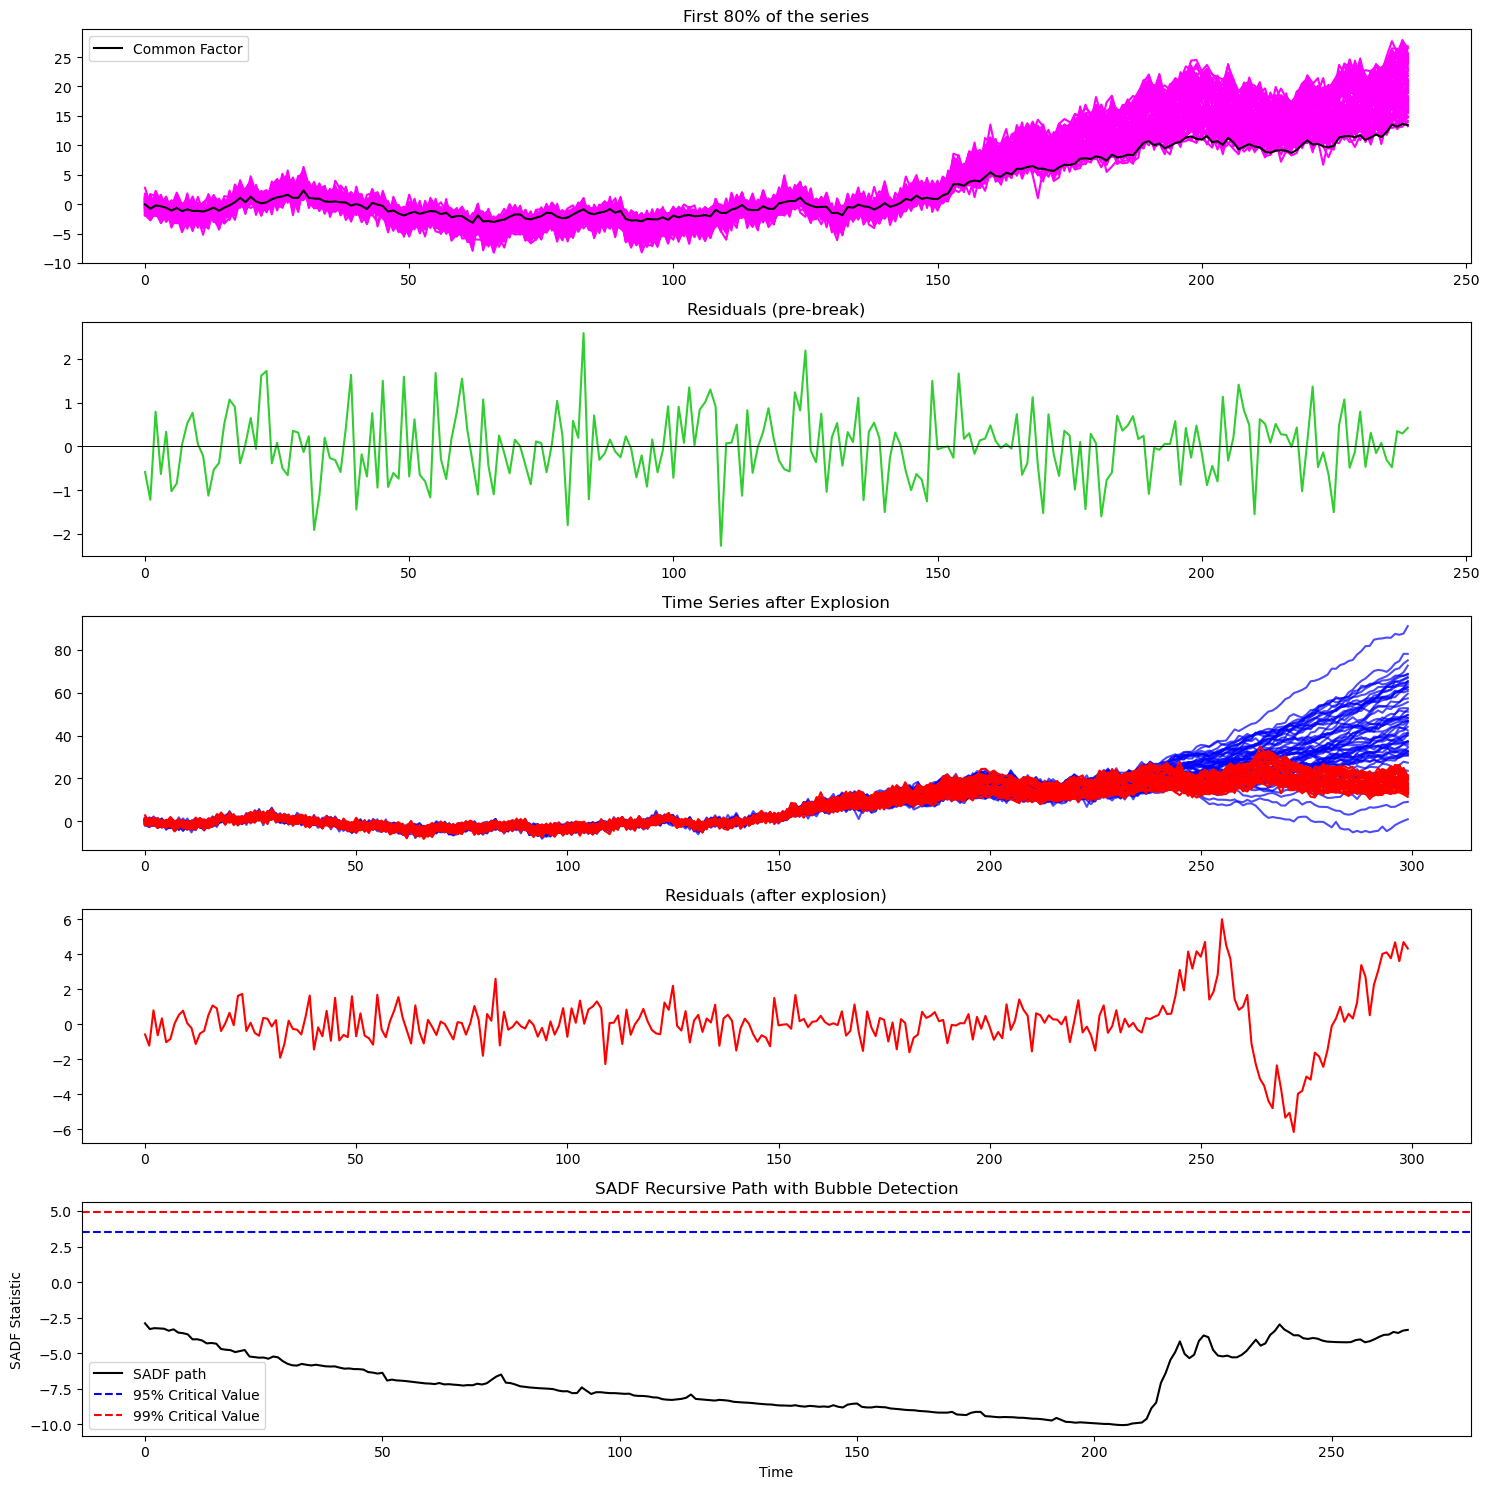

Time series is Non Explosive. SADF Value is: -2.9

Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [49]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [51]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [52]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

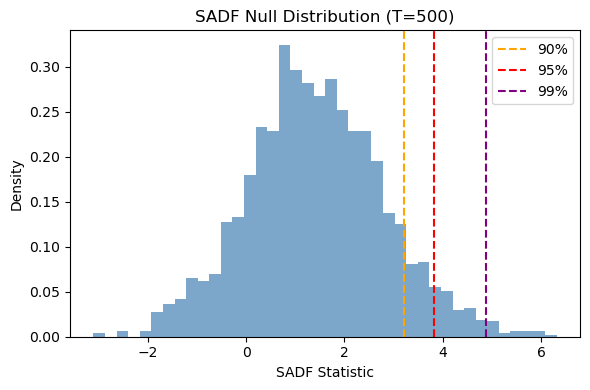

     Critical Value
90%        3.217054
95%        3.813539
99%        4.873648


beta =  [ 0.00799081  0.2420241  -0.12004484  0.12915504 -0.01655337 -0.06934862
  0.05127784  0.03833793  0.19649869  0.05810835 -0.04294548  0.01057774
 -0.05645351 -0.19693869  0.04932467  0.01024772  0.2218925  -0.05018683
  0.14451696  0.00141793 -0.01964583  0.04277337  0.08272716 -0.11744085
  0.02087945 -0.14291768 -0.00888368  0.14008491 -0.06518194 -0.04292242
 -0.08474903  0.04958098  0.03692893  0.07817758  0.09264189  0.16298955
 -0.0733652   0.02131528 -0.04459029  0.00354091  0.0370203  -0.0341389
 -0.04634162  0.01042462 -0.03284751  0.11772912 -0.09651759  0.09996782
 -0.14004059  0.01342141 -0.02169396 -0.03885034 -0.08985834 -0.01127377
 -0.11156482  0.06470643 -0.0884462   0.09734927 -0.08920332 -0.05197591
  0.08178762  0.03120823  0.21046284  0.06607826  0.04158185  0.0358165
 -0.01998061  0.07646237  0.09116907 -0.07468863  0.04102398  0.08893392
 -0.02413295  0.19480516  0.1122316 

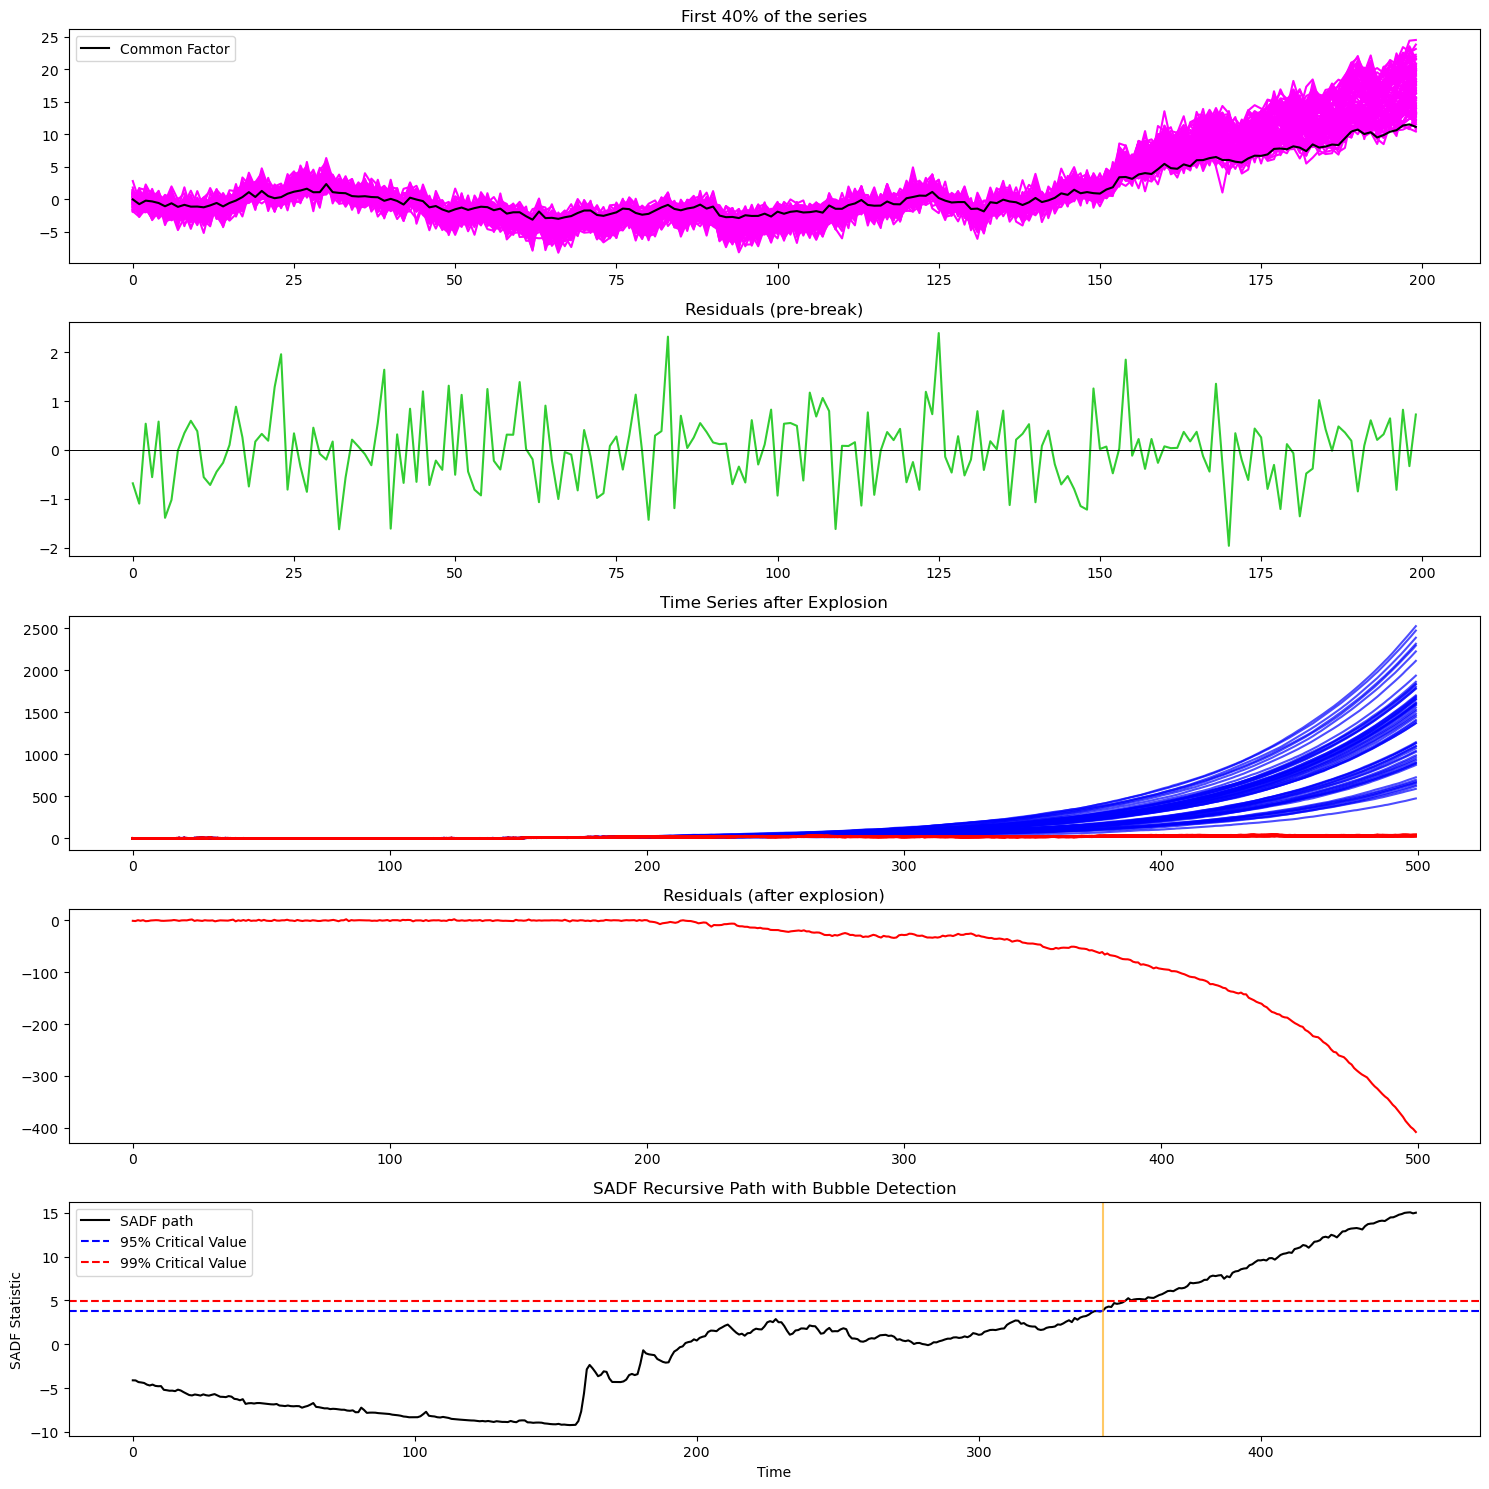

Time series is Explosive. SADF Value is: 15.04

Bubble starts at t=344
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [53]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

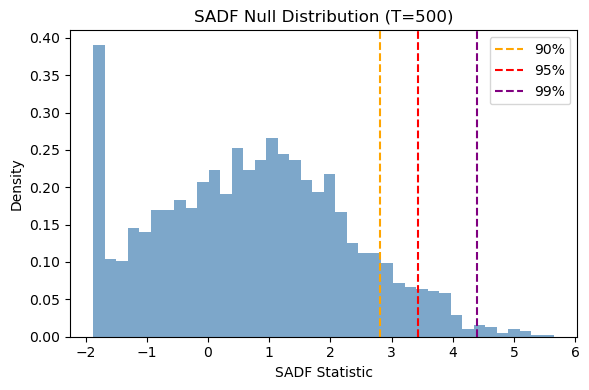

     Critical Value
90%        2.808455
95%        3.433836
99%        4.388443


beta =  [ 2.02908688e-02  1.26363649e-01 -1.18920919e-01  6.45783614e-02
  2.14133952e-03 -2.49430448e-02  7.68639192e-02  4.25293301e-02
  1.40670853e-01  3.61844799e-02 -4.40351672e-02  9.98314495e-03
 -7.91015746e-02 -3.02692449e-02  1.82115033e-02 -8.74433345e-03
  1.23517164e-01 -3.03096807e-02  8.58476025e-02  9.81842450e-02
 -2.94099508e-02 -8.44911578e-03  4.23677494e-02 -8.48704148e-02
 -4.50519717e-02 -9.33976459e-02  1.32175876e-01  1.03380042e-01
  4.77547449e-02 -2.86430505e-02 -6.77842084e-02  6.46038484e-02
  5.91122980e-02 -1.64803380e-02  6.39110121e-02  9.13224619e-02
  4.82032270e-02 -1.76864586e-03 -3.38175724e-02 -3.19500871e-02
 -4.62786756e-02  3.99956225e-02 -2.09098126e-02  5.14420363e-02
  3.13717561e-02  6.74729648e-02 -1.64007922e-01  4.33540425e-02
 -6.39144653e-02 -3.41466963e-02 -6.99166224e-03  6.22831992e-03
 -1.02125431e-01 -1.12787915e-04  2.02450790e-02  8.50943932e-02


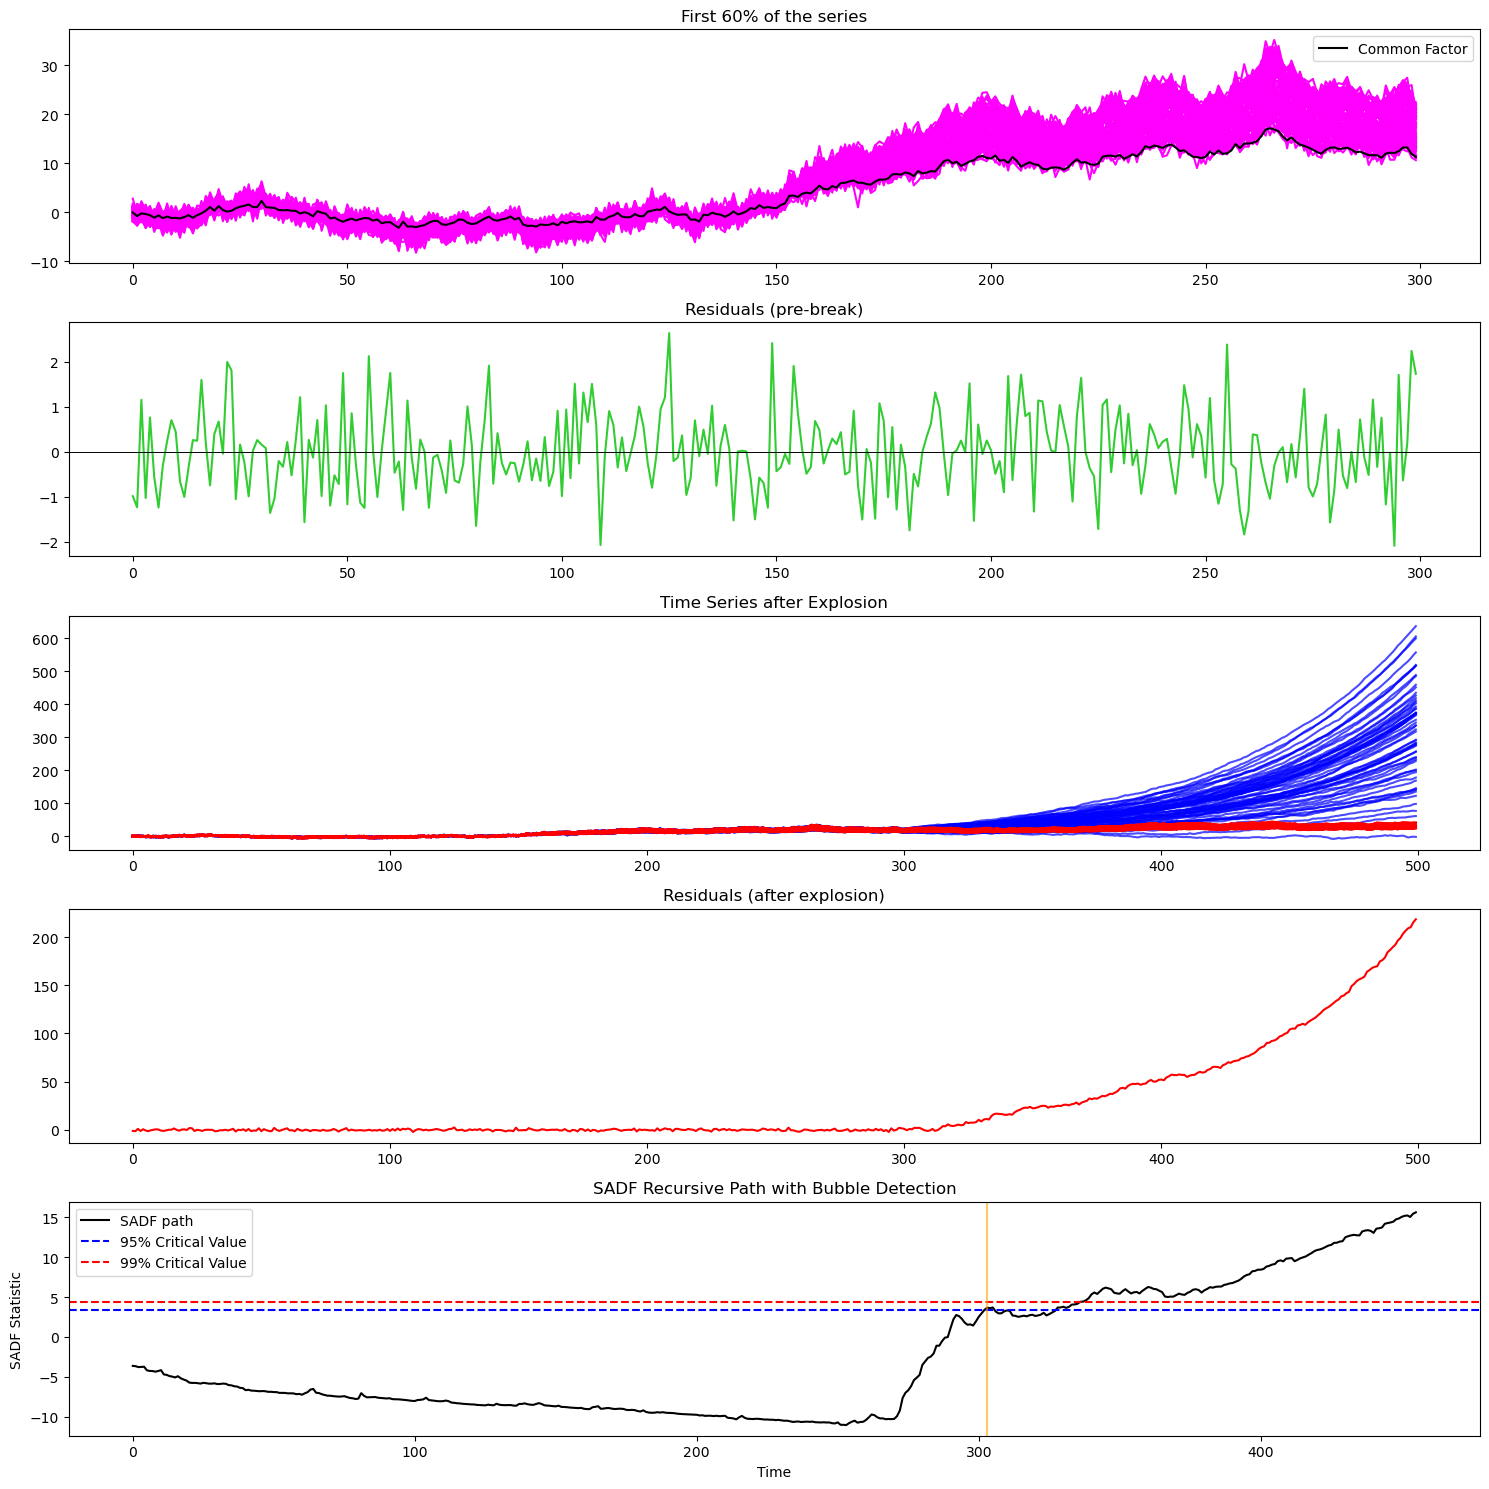

Time series is Explosive. SADF Value is: 15.63

Bubble starts at t=303
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [54]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

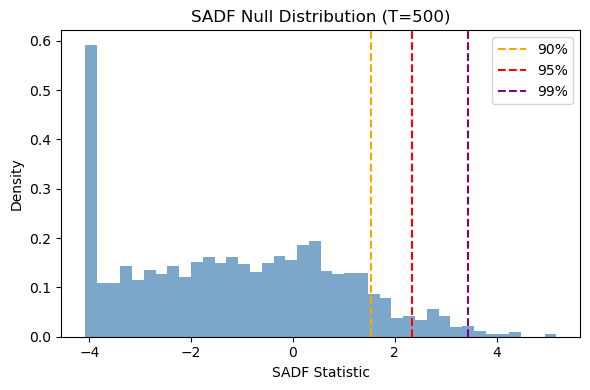

     Critical Value
90%        1.524668
95%        2.332111
99%        3.428459


beta =  [ 0.00817697  0.08968529 -0.09058478 -0.00312073 -0.03196427  0.01379148
  0.05229382 -0.04927929  0.13357072  0.02135966 -0.07023188  0.01328365
 -0.08653429 -0.05580869  0.00377291 -0.03898448  0.06691782 -0.0015618
  0.09588511  0.09867261  0.01704529  0.01508666  0.0311058  -0.08277371
  0.01542298 -0.06805934  0.09550768  0.06727838  0.06268921 -0.06023869
 -0.00809943  0.02429213  0.07024686 -0.00822671  0.07651919  0.02710499
  0.05155725 -0.01636623 -0.01554717 -0.04180822 -0.00954369 -0.02957541
  0.074057    0.11521589 -0.04798929  0.06544888 -0.03901803 -0.01363125
 -0.09712284 -0.0028349   0.01520511  0.02204824 -0.14162947  0.01110241
  0.07737871  0.09512255 -0.07685725 -0.07097137 -0.10203478 -0.05339487
  0.04893942  0.10380504 -0.00500413  0.07705315 -0.07129542  0.07572501
 -0.03619765  0.00836033  0.02825784 -0.00396188 -0.0192479   0.10987858
  0.06790355  0.02880274  0.0399058

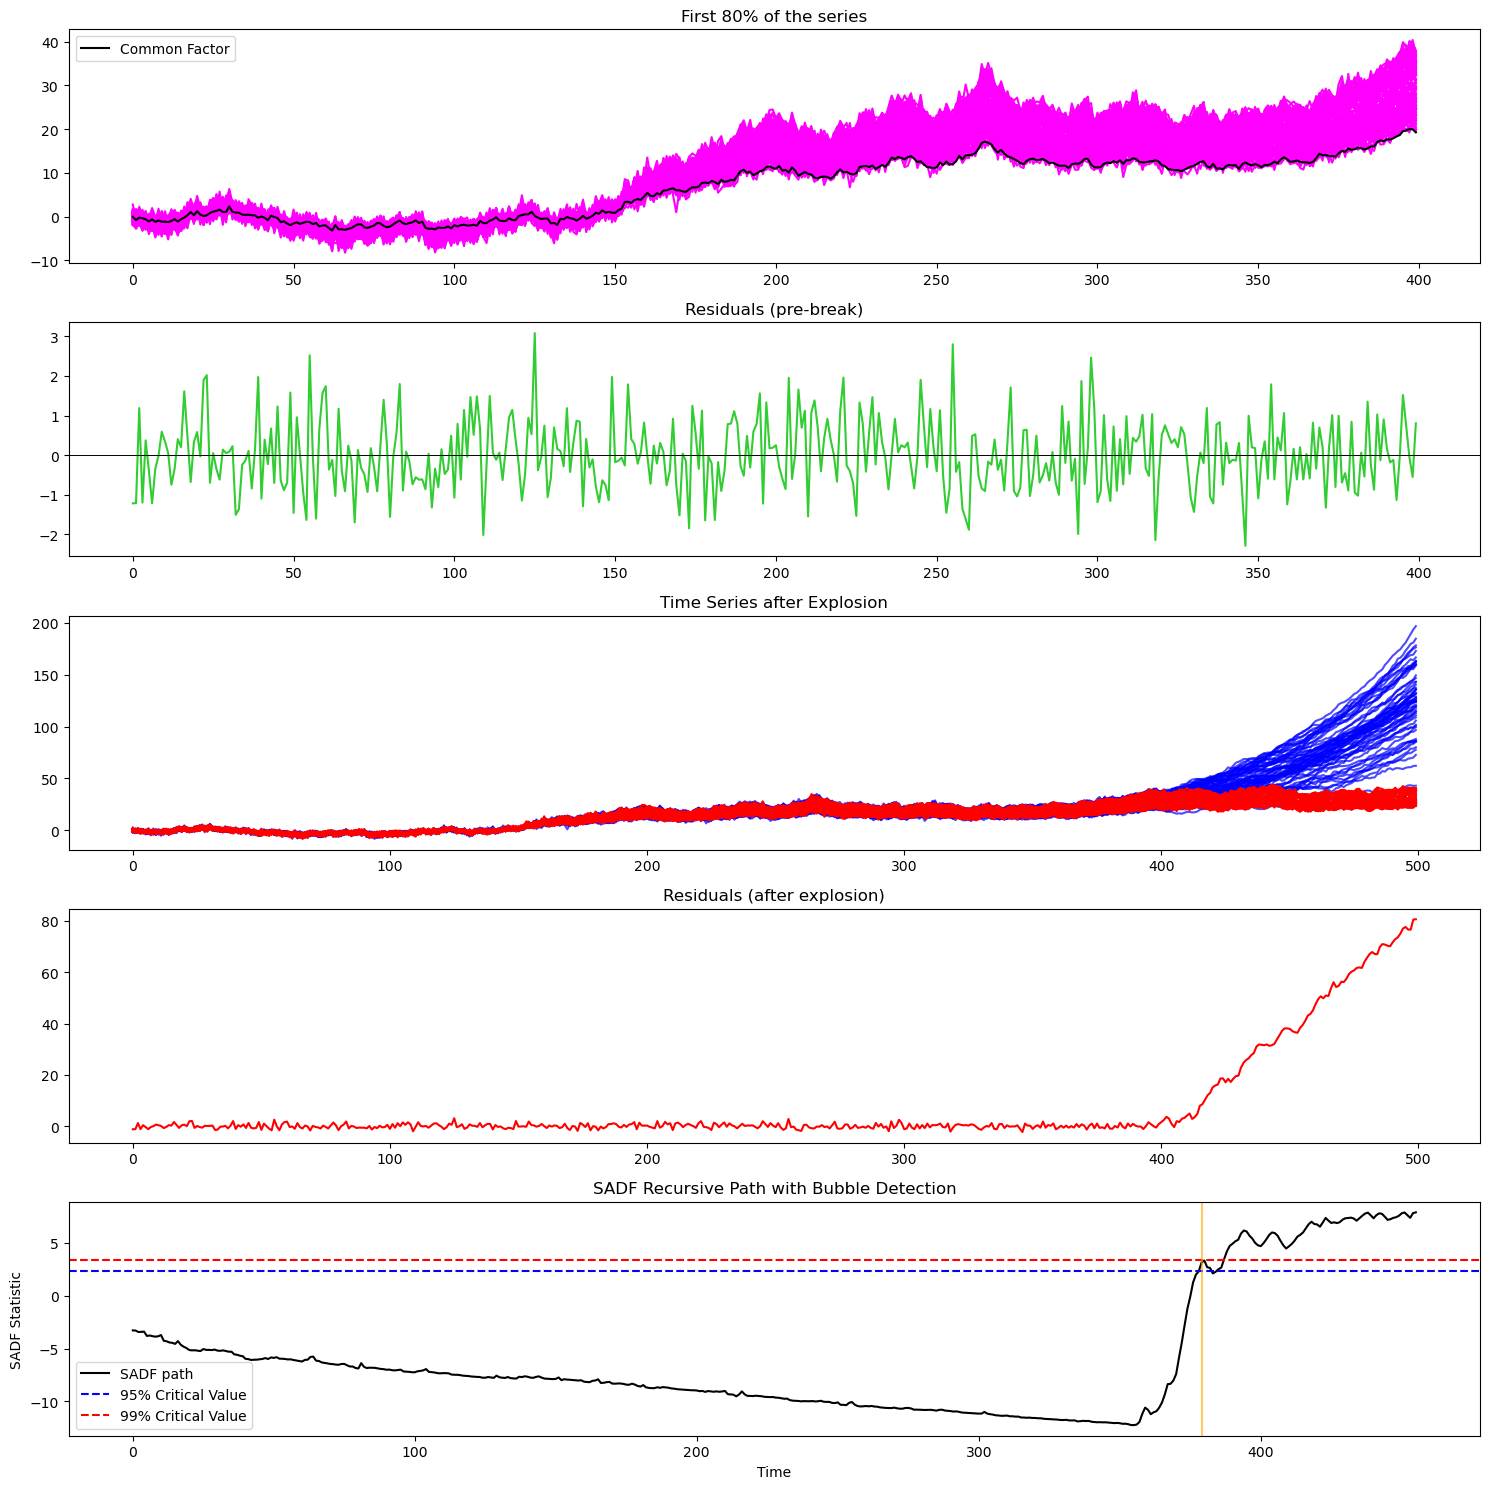

Time series is Explosive. SADF Value is: 7.9

Bubble starts at t=379
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [55]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [57]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [58]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

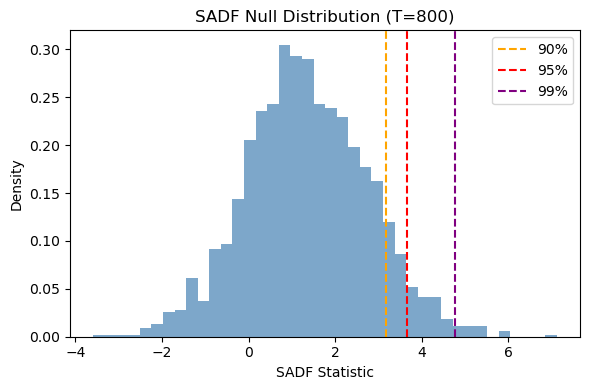

     Critical Value
90%        3.172811
95%        3.665280
99%        4.756650


beta =  [-0.02536602  0.08300846 -0.05940263  0.06431228 -0.02502449 -0.0184418
  0.08830961 -0.00724863  0.11837406  0.0337948  -0.04872288  0.02575851
 -0.10014491 -0.02765366  0.03525601 -0.02996826  0.12203375 -0.04050955
  0.09792832  0.12304102 -0.0182246  -0.00821811  0.0281341  -0.05585087
 -0.02678503 -0.09580656  0.13150276  0.09149365  0.03298277 -0.04411353
 -0.04667611  0.04806546  0.09260532 -0.01990836  0.09144703  0.07710018
  0.07445202  0.00712448 -0.00976067 -0.0450894  -0.02292115  0.02636101
  0.05346917  0.07429198 -0.0301991   0.06950428 -0.11612101 -0.00128523
 -0.07802067 -0.03150419 -0.00927931 -0.00079857 -0.13530119 -0.00578209
  0.01989487  0.07938482 -0.0256358  -0.05021303 -0.09550188 -0.02037364
  0.07754362  0.11053155  0.01189482  0.07513292 -0.07055835  0.02948313
 -0.0399415   0.02519846  0.04968397 -0.02018851 -0.05483974  0.11389404
  0.05959472  0.00552139  0.0629445

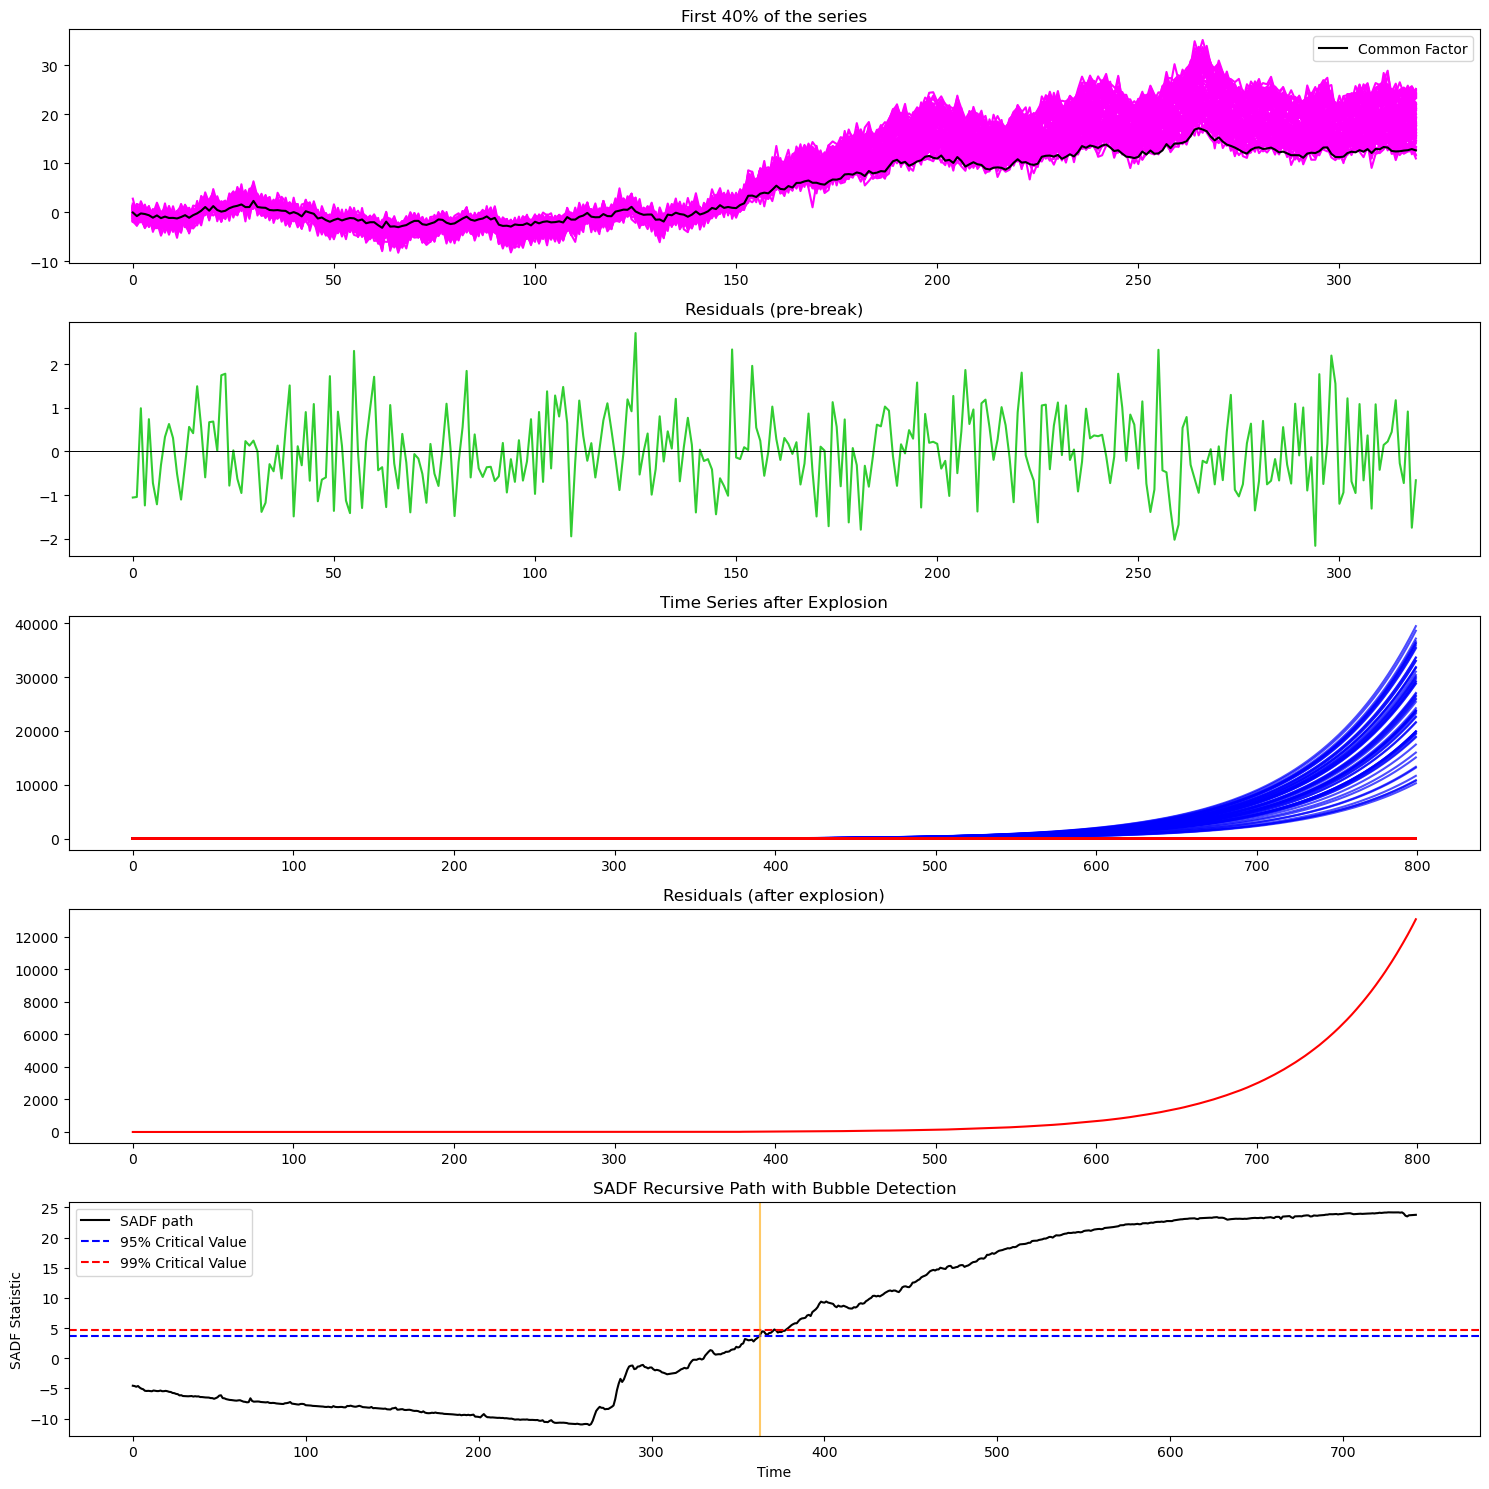

Time series is Explosive. SADF Value is: 24.17

Bubble starts at t=363
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [59]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

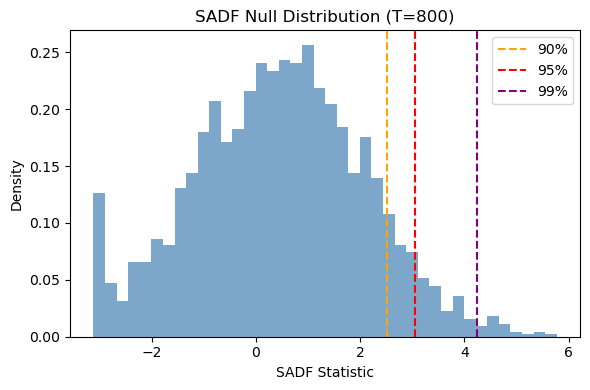

     Critical Value
90%        2.509511
95%        3.061531
99%        4.250013


beta =  [-0.00223151  0.05906643 -0.04546182  0.00262196  0.00555764 -0.0412807
  0.06223752 -0.01899552  0.14665067  0.02084453 -0.04821005  0.02524661
 -0.05949481 -0.02924738  0.02983037 -0.04039106  0.03546686 -0.00209388
  0.07618372  0.04673309 -0.01442072 -0.02593863 -0.01808271 -0.04129187
  0.00888243 -0.04416761  0.0908881   0.07703424  0.04441092 -0.09111183
  0.00463534  0.02891082  0.06431066 -0.03073092  0.04811154  0.01945628
  0.05304209  0.00254906 -0.03244796 -0.02542644  0.00257515 -0.01305927
  0.02367365  0.07287543 -0.04319746  0.05418965 -0.02681538  0.00967294
 -0.06517025 -0.01117865  0.01794003  0.04117285 -0.11920796  0.02175776
  0.07176641  0.10509996 -0.07302041 -0.04907682 -0.07325387 -0.05509075
  0.03818351  0.11679135 -0.01170812  0.03265968 -0.02869386  0.0753321
 -0.04174124  0.03590212  0.03420581 -0.01390877 -0.00219746  0.07292624
  0.05070853  0.04486591  0.05596978

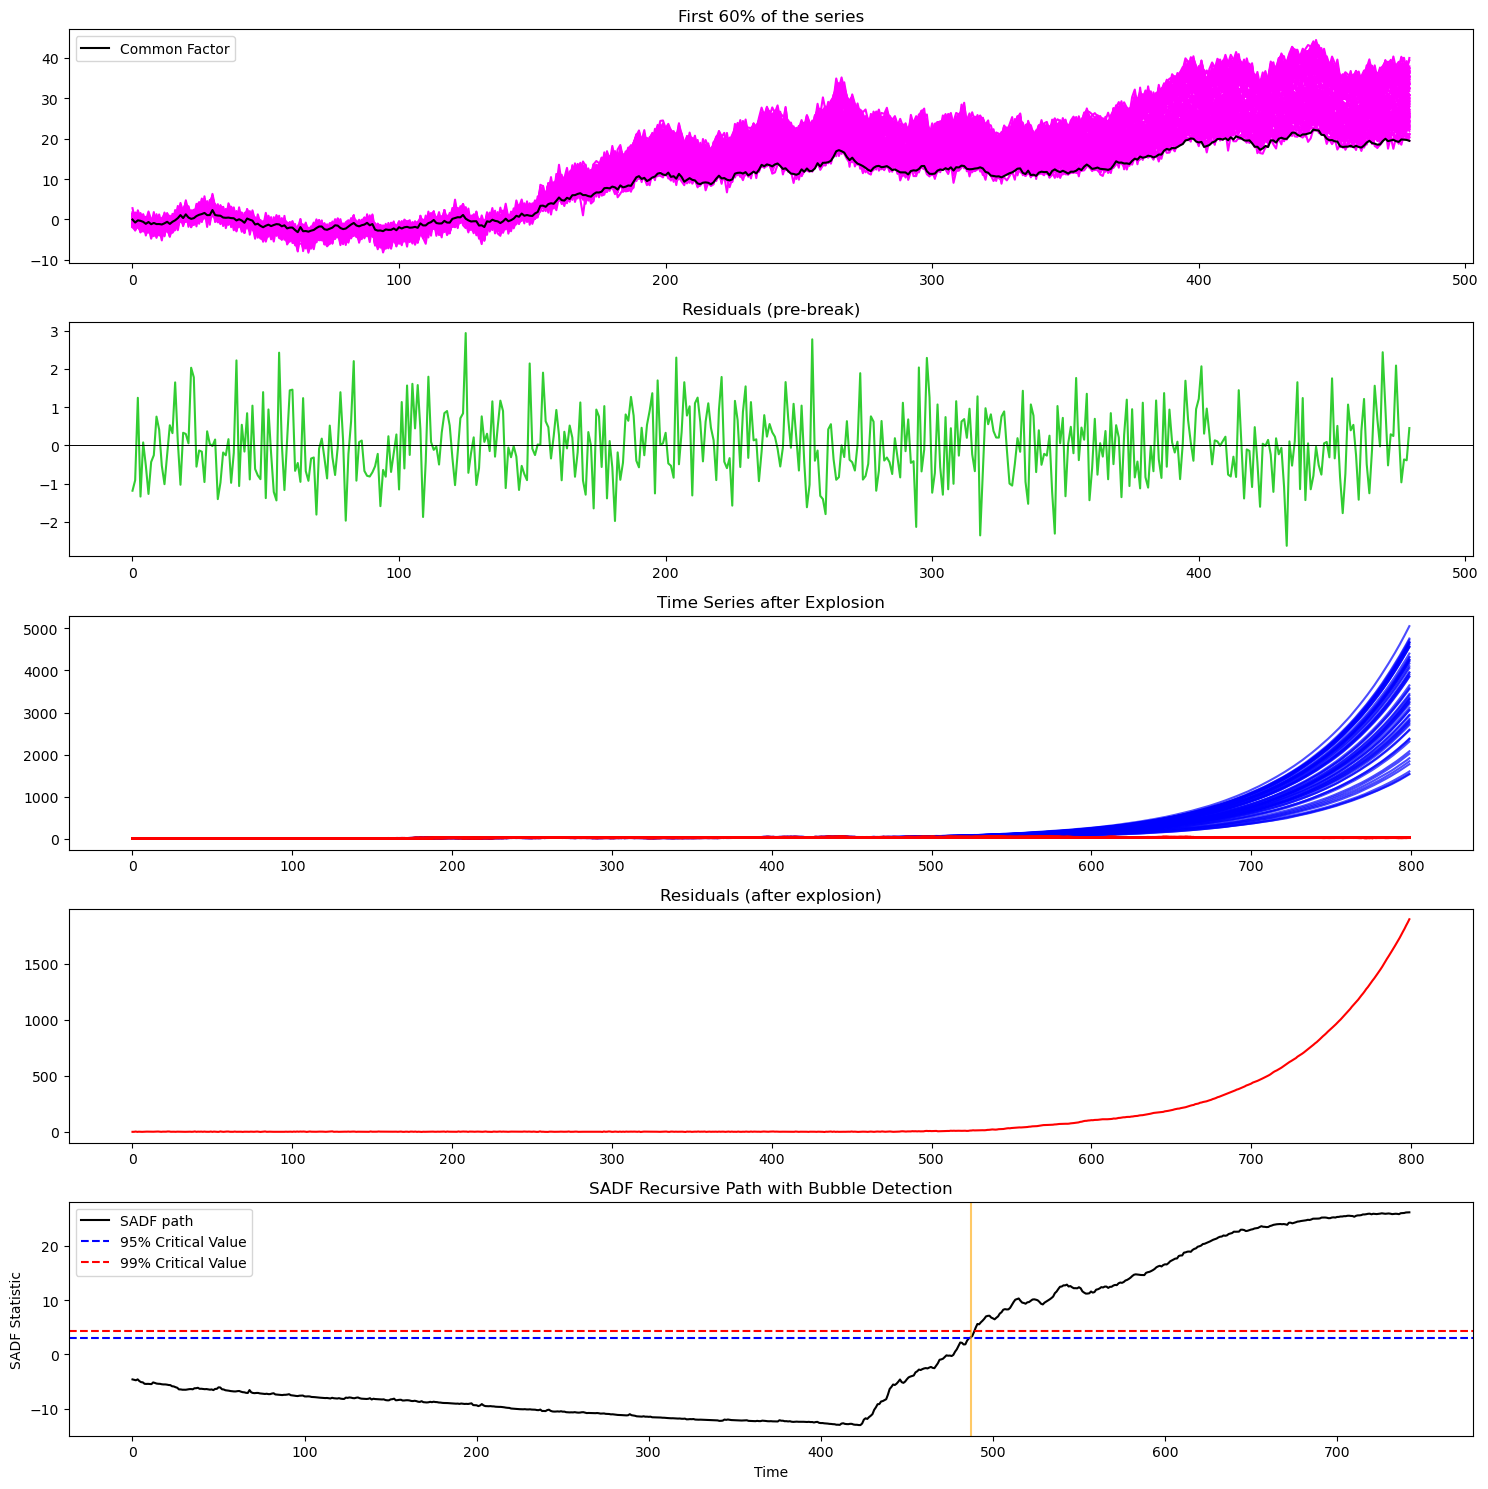

Time series is Explosive. SADF Value is: 26.19

Bubble starts at t=487
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [60]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

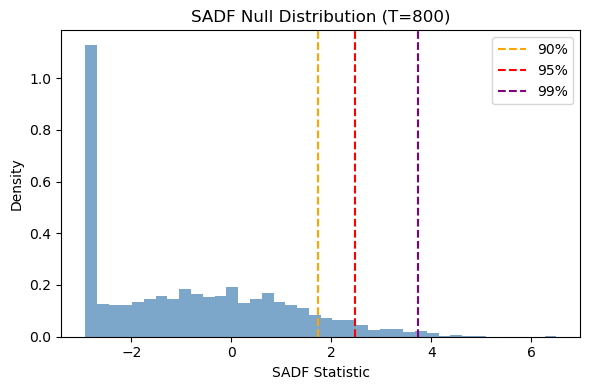

     Critical Value
90%        1.729520
95%        2.478407
99%        3.732714


beta =  [-0.0328992   0.07704264 -0.03965897 -0.0107133  -0.0114891  -0.03775791
  0.00436559  0.06048255  0.07390686  0.03778306 -0.02496804  0.01893577
 -0.05031568 -0.05153491  0.0176522  -0.01284618  0.05552345  0.00972028
  0.07919641  0.00363107 -0.01478129 -0.00285914 -0.01056936 -0.0219574
  0.04840992 -0.05071159  0.08145057  0.07176071  0.05093911 -0.08631518
 -0.00869333 -0.01015882  0.01846272 -0.02217256  0.05777088  0.01845649
  0.03309683  0.00512903 -0.03702985  0.02153464 -0.01170334 -0.01562121
  0.0168321   0.03306494  0.00702546  0.04433046 -0.00987771  0.03852086
 -0.03338655  0.02269913 -0.00852934  0.04732597 -0.08605622  0.04100258
  0.03594108  0.10477046 -0.07285399 -0.02383745 -0.03724324 -0.0364992
  0.03485617  0.09727615 -0.01619468 -0.01611279 -0.0115037   0.04065299
 -0.05890305  0.00824067 -0.00168288  0.01298576  0.02864861  0.08392906
  0.04342568  0.02883951  0.03956257

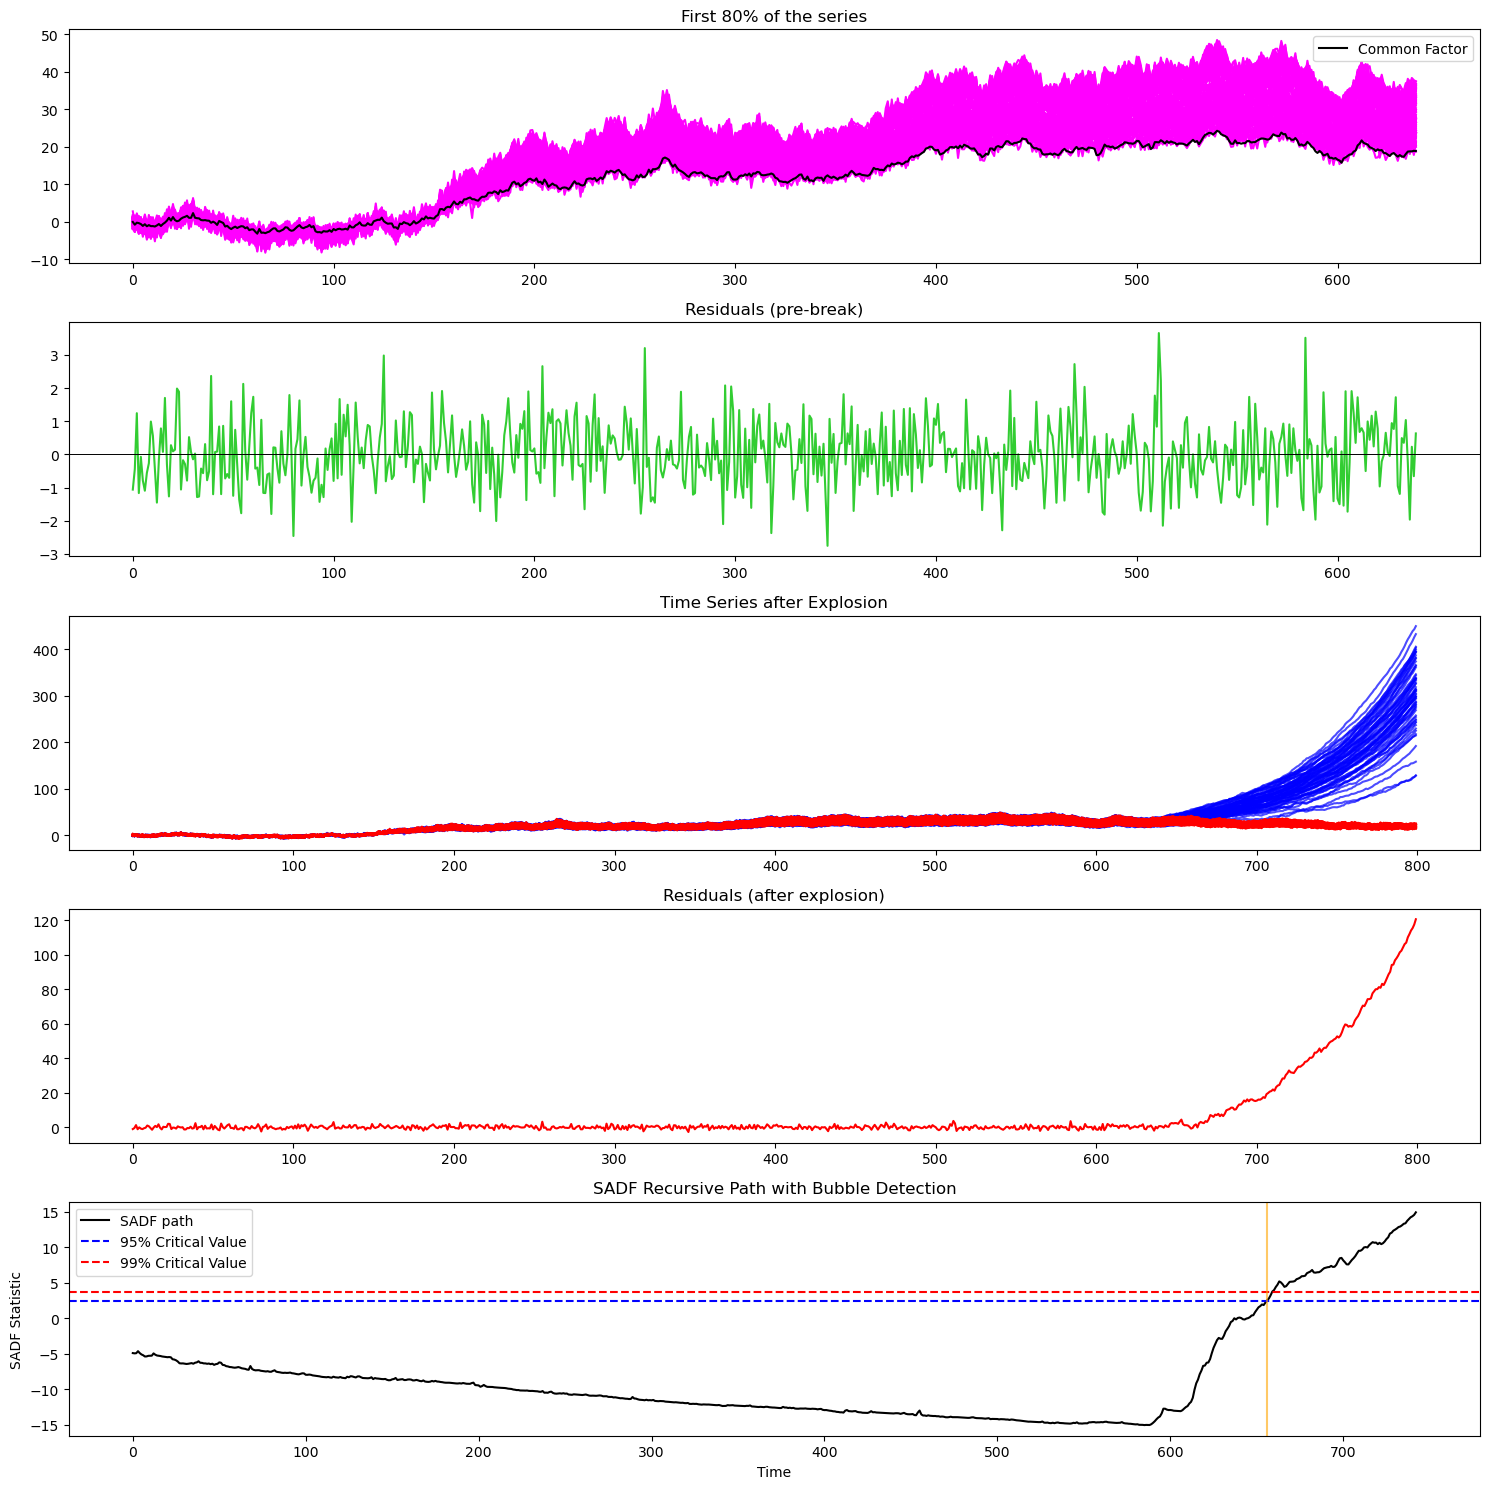

Time series is Explosive. SADF Value is: 14.94

Bubble starts at t=656
Multipliers: [1.0957  1.63368 1.86579 1.63527 1.25488 1.32438 1.02721 1.00907 1.41847
 1.40056 1.15646 1.7472  1.87148 1.19902 1.49114 1.92929 1.82657 1.41094
 1.66811 1.68252 1.92528 1.07342 1.19191 1.66091 1.50267 1.75776 1.91787
 1.92481 1.68524 1.25598 1.68807 1.79341 1.31322 1.39204 1.45577 1.53568
 1.54454 1.0854  1.33722 1.05919 1.17865 1.75682 1.95065 1.37833 1.27223
 1.26742 1.27971 1.1541  1.13793 1.58659 1.76531 1.20839 1.71576 1.49651
 1.89477 1.54492 1.92757 1.21431 1.84581 1.93297 1.834   1.81194 1.87998
 1.78794 1.72379 1.34062 1.47326 1.09442 1.65118 1.20878 1.22807 1.76648
 1.41443 1.13104 1.25881 1.4498  1.94261 1.14597 1.27927 1.59661 1.44916
 1.21857 1.43382 1.61641 1.85999 1.5217  1.74086 1.34896 1.42413 1.81027
 1.85021 1.83489 1.13398 1.33208 1.85919 1.07997 1.27162 1.31489 1.38345
 1.74835]


In [61]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [63]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [64]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

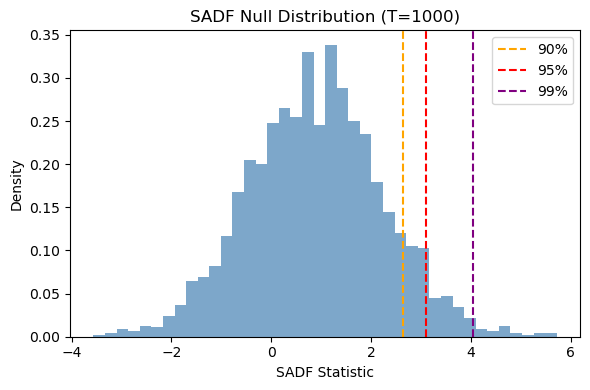

     Critical Value
90%        2.636899
95%        3.098093
99%        4.038968


beta =  [ 0.00817697  0.08968529 -0.09058478 -0.00312073 -0.03196427  0.01379148
  0.05229382 -0.04927929  0.13357072  0.02135966 -0.07023188  0.01328365
 -0.08653429 -0.05580869  0.00377291 -0.03898448  0.06691782 -0.0015618
  0.09588511  0.09867261  0.01704529  0.01508666  0.0311058  -0.08277371
  0.01542298 -0.06805934  0.09550768  0.06727838  0.06268921 -0.06023869
 -0.00809943  0.02429213  0.07024686 -0.00822671  0.07651919  0.02710499
  0.05155725 -0.01636623 -0.01554717 -0.04180822 -0.00954369 -0.02957541
  0.074057    0.11521589 -0.04798929  0.06544888 -0.03901803 -0.01363125
 -0.09712284 -0.0028349   0.01520511  0.02204824 -0.14162947  0.01110241
  0.07737871  0.09512255 -0.07685725 -0.07097137 -0.10203478 -0.05339487
  0.04893942  0.10380504 -0.00500413  0.07705315 -0.07129542  0.07572501
 -0.03619765  0.00836033  0.02825784 -0.00396188 -0.0192479   0.10987858
  0.06790355  0.02880274  0.0399058

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

3.67


In [ ]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment_2.csv", index=False)



import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)